# Air Quality Of India  -  An Extensive Exploratory Data Analysis

In this EDA project, I have analyzed the air quality of several cities in India based on data compiled by Central Pollution Control Board (CPCB) from 2010 to 2023. 

![](https://imgur.com/a6qh1Tg.png)

Air pollution is a pressing concern in India, where rapidly growing urbanization, industrialization, and vehicular emissions have contributed to deteriorating air quality. With its large population and diverse geographical features, India faces significant challenges in managing and mitigating pollution levels. The country has been grappling with high levels of particulate matter, including PM10 and PM2.5, which pose serious health risks. The government has implemented various measures and policies to address this issue, including the National Air Quality Index (NAQI), initiatives promoting renewable energy, and stricter emission standards for industries and vehicles. This EDA project focuses on analyzing air quality data from multiple cities in India, aiming to gain insights into pollution trends, identify contributing factors, and highlight the importance of ongoing efforts to combat air pollution.

The aim of this project is to conduct an exploratory data analysis (EDA) on the provided air quality dataset for Indian cities. By analyzing the data, we seek to uncover meaningful insights into the temporal and spatial variations of air pollution levels across different cities and states in India. Our objective is to identify patterns, trends, and potential correlations between various pollutants, such as PM2.5, PM10, NO2, NOx, NH3, SO2, CO, Ozone, Benzene, Toluene, and other relevant parameters. Through this analysis, we aim to shed light on the severity and distribution of air pollution in India, understand the impact of different pollutants on air quality, and highlight areas that require immediate attention and intervention. By gaining a deeper understanding of the data, we strive to contribute to informed decision-making, policy formulation, and initiatives aimed at mitigating air pollution and improving the overall well-being of the population.

# Project Outline

   1. Setting Up The Project
   
    - Downloading & Importing Modules
    - Downloading the Dataset
   2. Exploring the Data
   
    - Available Data
    - Available Parameters
    - Data and Parameters that the exploration is focused on
    - Parameter Definitions and Significance
    
   3. Data Processing Pipeline
    
    - Data Reading
    - Feature Engineering
    - Data Filtering
    - Putting it all together

   4. Open Ended Exploratory Data Analysis and Visualization

    - Univariate Analysis
    - Time Series Analysis
    - Multivariate Analysis
    
   5. Ask & Answer Questions

   6. Summary & Conclusions

   7. Future Work & Reference

# 1. SETTING UP THE PROJECT

# Downloading and Importing Modules

In [1]:
!pip install jovian opendatasets wordcloud --upgrade --quiet

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
from typing import List
import matplotlib.gridspec as gridspec
import jovian
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize'] = (10,8)
pd.set_option('display.max_columns', None)

# Downloading the Dataset

Source - https://www.kaggle.com/datasets/abhisheksjha/time-series-air-quality-data-of-india-2010-2023

In [3]:
dataset_url = "https://www.kaggle.com/datasets/abhisheksjha/time-series-air-quality-data-of-india-2010-2023"
# od.download(dataset_url)
data_folder = "time-series-air-quality-data-of-india-2010-2023/"

# 2. EXPLORING THE DATA

# Available Data

In [4]:
stations_df = pd.read_csv(data_folder + "stations_info.csv", header = 0)

In [5]:
total_number_of_files = len(stations_df['file_name'].unique())
total_number_of_files

453

The air quality dataset analyzed in this project provides a comprehensive and reliable source of information on air pollution levels in 453 stations (241 cities) across India's 31 states from 2010 to 2023. Collected from the Central Control Room for Air Quality Management, the dataset offers valuable insights into the trends, patterns, and conditions of air quality over a span of 13 years. This dataset serves as a valuable resource for researchers, policymakers, and the general public in understanding the extent of air pollution, identifying regions with high pollution levels, evaluating the effectiveness of air quality control measures, and formulating strategies to improve air quality and public health. With the ability to perform statistical analyses, create visualizations, and develop predictive models, this dataset enables actionable insights to address India's air pollution challenges effectively.

**Visual representation (with a wordcloud) of the cities and states for which air quality information is available**

This is a huge dataset with information for over 241 distinct cities across 31 states. The available cities and states are: 

In [6]:
cities, states = stations_df['city'].unique()[:100], stations_df['state'].unique()

In [11]:
def create_worldcloud(words_list:List, type_of_words:str):
    
    """
    Creating a wordcloud for cities and states for attractive visualization
    """
    word_cloud_lst = Counter(words_list)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("The Air Quality Information Is Available for these " + type_of_words)
    plt.axis("off")
    plt.show()
    return

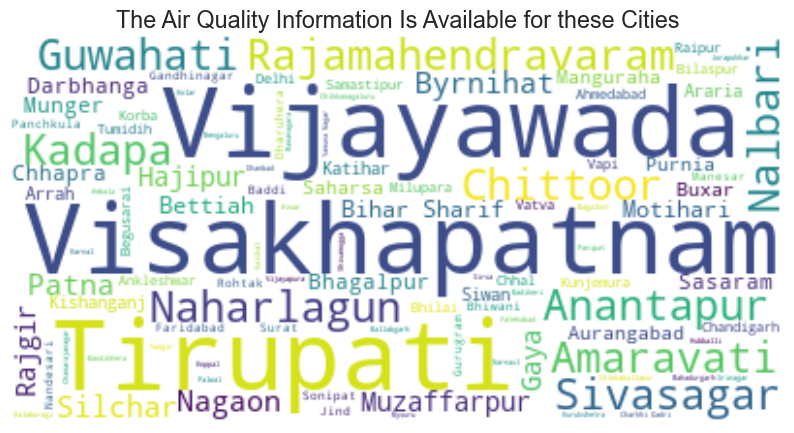

In [12]:
create_worldcloud(cities, 'Cities')

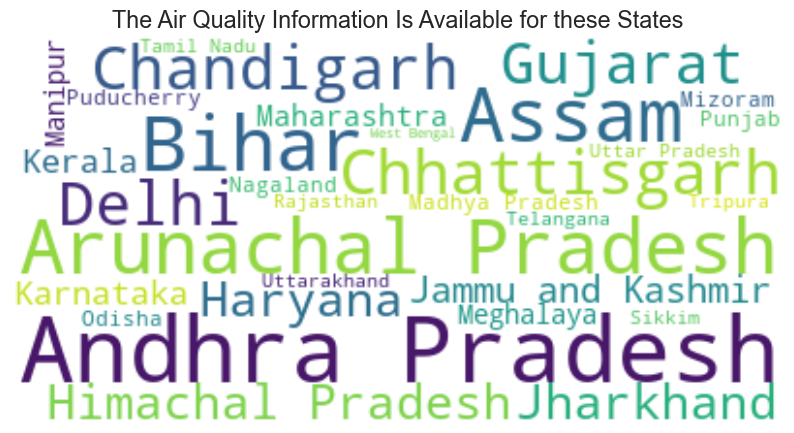

In [13]:
create_worldcloud(states, 'States')

# Available Parameters

<table><tr>
<td> <img src="https://imgur.com/PU0XJD8.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="https://imgur.com/zcrWmOU.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="https://imgur.com/GFQvTd2.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

**Short description of all the features**

In [14]:
pd.options.display.max_colwidth = 100
params = [
    ['PM10', 'Particulate Matter 10', 'Fine particles with diameter ≤ 10 micrometers in the air', 'ug/m3'],
    ['PM2.5', 'Particulate Matter 2.5', 'Fine particles with diameter ≤ 2.5 micrometers in the air', 'ug/m3'],
    ['CO', 'Carbon Monoxide', 'Colorless, odorless gas from incomplete combustion of carbon', 'mg/Nm3, mg/m3, ng/m3, ug/m3'],
    ['CO2', 'Carbon Dioxide', 'Greenhouse gas produced by combustion and other processes', 'mg/m3'],
    ['NO', 'Nitric Oxide', 'Gas produced by combustion processes', 'mg/m3, ppb, ppm, ug/m3'],
    ['NO2', 'Nitrogen Dioxide', 'Reddish-brown gas formed by oxidation of nitric oxide', 'ug/m3'],
    ['NOx', 'Nitrogen Oxides', 'Mixture of nitric oxide (NO) and nitrogen dioxide (NO2)', 'ppb, ppm, ug/m3'],
    ['NH3', 'Ammonia', 'Colorless gas with a pungent odor', 'ppb, ug/m3'],
    ['SO2', 'Sulfur Dioxide', 'Gas formed by burning sulfur-containing fossil fuels', 'ug/m3'],
    ['Temp', 'Temperature', 'Degree of hotness or coldness of the air', 'degrees Celsius'],
    ['AT', 'Air Temperature', 'Temperature of the air in the surrounding environment', 'degrees Celsius'],
    ['BP', 'Barometric Pressure', 'Atmospheric pressure exerted by the weight of the air', 'W/mt2, mg/m3, mmHg'],
    ['Benzene', 'Concentration of Benzene', 'Presence of Benzene in the air', 'mg/m3, ug/m3'],
    ['CH4', 'Methane', 'Colorless, odorless gas and primary component of natural gas', 'ug/m3'],
    ['Eth-Benzene', 'Concentration of Ethylbenzene', 'Presence of Ethylbenzene in the air', 'ug/m3'],
    ['Gust', 'Wind Gust', 'Sudden, brief increase in wind speed', 'kl/h, km/hr, m/s'],
    ['HCHO', 'Formaldehyde', 'Colorless gas with a strong odor', 'ug/m3'],
    ['Hg', 'Mercury', 'Toxic heavy metal present in the air', 'ug/m3'],
    ['MH', 'Mixing Height', 'Vertical extent of the well-mixed atmospheric layer', 'meters (m)'],
    ['MP-Xylene', 'Concentration of Meta-Para Xylene', 'Presence of Meta-Para Xylene in the air', 'ug/m3'],
    ['NMHC', 'Non-Methane Hydrocarbons', 'Total amount of hydrocarbons excluding methane in the air', 'ug/m3'],
    ['O Xylene', 'Concentration of Ortho-Xylene', 'Presence of Ortho-Xylene in the air', 'ug/m3'],
    ['Ozone', 'Ozone Concentration', 'Presence of ozone in the air', 'ppb, ug/m3'],
    ['Power', 'Power Consumption', 'Amount of electrical power being consumed', 'Watts (W)'],
    ['RF', 'Rainfall', 'Amount of precipitation in the form of rain', 'm/s, mm'],
    ['RH', 'Relative Humidity', 'Amount of moisture in the air relative to its capacity', '%, W/mt2, degree'],
    ['SPM', 'Suspended Particulate Matter', 'Solid or liquid particles suspended in the air', 'ug/m3'],
    ['SR', 'Solar Radiation', 'Energy received from the sun', 'W/mt2, ug/m3'],
    ['THC', 'Total Hydrocarbons', 'Total amount of hydrocarbon compounds in the air', 'ug/m3'],
    ['Toluene', 'Concentration of Toluene', 'Presence of Toluene in the air', 'ug/m3'],
    ['VWS', 'Wind Speed', 'Speed of horizontal air movement', 'degree, m/s'],
    ['Variance', 'Variance', 'Measure of the spread between numbers in a dataset', 'n'],
    ['WD', 'Wind Direction', 'Direction from which the wind is blowing', 'deg, degree C, degree'],
    ['WS', 'Wind Speed', 'Speed of air movement', 'm/s, ug/m3'],
    ['Xylene', 'Concentration of Xylene', 'Presence of Xylene in the air', 'ug/m3']
]

params_df = pd.DataFrame(params, columns=['Abbreviation', 'Feature', 'Definition', 'Measurement Units'])
display(params_df)


Abbreviation                            Feature  \
0          PM10              Particulate Matter 10   
1         PM2.5             Particulate Matter 2.5   
2            CO                    Carbon Monoxide   
3           CO2                     Carbon Dioxide   
4            NO                       Nitric Oxide   
5           NO2                   Nitrogen Dioxide   
6           NOx                    Nitrogen Oxides   
7           NH3                            Ammonia   
8           SO2                     Sulfur Dioxide   
9          Temp                        Temperature   
10           AT                    Air Temperature   
11           BP                Barometric Pressure   
12      Benzene           Concentration of Benzene   
13          CH4                            Methane   
14  Eth-Benzene      Concentration of Ethylbenzene   
15         Gust                          Wind Gust   
16         HCHO                       Formaldehyde   
17           Hg                            Mercury   
18           MH                      Mixing Height   
19    MP-Xylene  Concentration of Meta-Para Xylene   
20         NMHC           Non-Methane Hydrocarbons   
21     O Xylene      Concentration of Ortho-Xylene   
22        Ozone                Ozone Concentration   
23        Power                  Power Consumption   
24           RF                           Rainfall   
25           RH                  Relative Humidity   
26          SPM       Suspended Particulate Matter   
27           SR                    Solar Radiation   
28          THC                 Total Hydrocarbons   
29      Toluene           Concentration of Toluene   
30          VWS                         Wind Speed   
31     Variance                           Variance   
32           WD                     Wind Direction   
33           WS                         Wind Speed   
34       Xylene            Concentration of Xylene   

                                                      Definition  \
0       Fine particles with diameter ≤ 10 micrometers in the air   
1      Fine particles with diameter ≤ 2.5 micrometers in the air   
2   Colorless, odorless gas from incomplete combustion of carbon   
3      Greenhouse gas produced by combustion and other processes   
4                           Gas produced by combustion processes   
5          Reddish-brown gas formed by oxidation of nitric oxide   
6        Mixture of nitric oxide (NO) and nitrogen dioxide (NO2)   
7                              Colorless gas with a pungent odor   
8           Gas formed by burning sulfur-containing fossil fuels   
9                       Degree of hotness or coldness of the air   
10         Temperature of the air in the surrounding environment   
11         Atmospheric pressure exerted by the weight of the air   
12                                Presence of Benzene in the air   
13  Colorless, odorless gas and primary component of natural gas   
14                           Presence of Ethylbenzene in the air   
15                          Sudden, brief increase in wind speed   
16                              Colorless gas with a strong odor   
17                          Toxic heavy metal present in the air   
18           Vertical extent of the well-mixed atmospheric layer   
19                       Presence of Meta-Para Xylene in the air   
20     Total amount of hydrocarbons excluding methane in the air   
21                           Presence of Ortho-Xylene in the air   
22                                  Presence of ozone in the air   
23                     Amount of electrical power being consumed   
24                   Amount of precipitation in the form of rain   
25        Amount of moisture in the air relative to its capacity   
26                Solid or liquid particles suspended in the air   
27                                  Energy received from the sun   
28              Total amount of hydrocarbon compounds in the air   
29                

# Data and Parameters That The Exploration Is Focused On

The [Environmental Protection Agency](https://www.miamidade.gov/environment/library/brochures/air-quality-index.pdf) establishes an Air Quality Index (AQI) for five major air pollutants regulated by the Clean Air Act. Each of these pollutants has a national air quality standard set by EPA to protect public health:

- particle pollution (PM2.5 and PM10)
- ground-level ozone (Ozone)
- carbon monoxide (CO)
- sulfur dioxide (SO2)
- nitrogen dioxide (NO2)

According to [Census 2011](https://www.adda247.com/defence-jobs/largest-state-in-india-by-population/), the top 10 largest state in India by population are : 

1. Uttar Pradesh
2. Maharashtra
3. Bihar
4. West Bengal
5. Madhya Pradesh
6. Tamil Nadu
7. Rajasthan
8. Karnataka
9. Gujarat
10. Andhra Pradesh

* And Union Territory - Delhi

For the remainder of the project, I shall focus my exploratory analysis on these parameters and states to get insights on pollution levels.

# Parameter Definitions and Significance

### Particulate Matter

* PM10 refers to airborne particles with a diameter of 10 micrometers or smaller. PM10 levels indicate the presence of coarse particles in the air, such as dust, pollen, and larger pollutants. Monitoring PM10 levels helps assess air quality and potential health risks associated with inhalation of these particles.

* PM2.5 refers to fine particles with a diameter of 2.5 micrometers or smaller. PM2.5 is a critical measure of air pollution as these particles can penetrate deep into the respiratory system. Monitoring PM2.5 levels provides insights into the presence of pollutants from combustion processes, industrial emissions, and vehicle exhaust, which can have severe health implications.

<img src="https://imgur.com/UBG96tx.png" width="600" height="300">

**What Kinds of Harmful Effects Can Particulate Matter Cause?**

A number of adverse health impacts have been associated with exposure to both PM2.5 and PM10. For PM2.5, short-term exposures (up to 24-hours duration) have been associated with premature mortality, increased hospital admissions for heart or lung causes, acute and chronic bronchitis, asthma attacks, emergency room visits, respiratory symptoms, and restricted activity days. These adverse health effects have been reported primarily in infants, children, and older adults with preexisting heart or lung diseases. In addition, of all of the common air pollutants, PM2.5 is associated with the greatest proportion of adverse health effects related to air pollution.

![Levels of Severity](https://imgur.com/3T9Ew0f.png)

### Ozone 

Ozone is a gas composed of three atoms of oxygen. Ozone occurs both in the Earth's upper atmosphere and at ground level. Ozone can be good or bad, depending on where it is found.

Called stratospheric ozone, good ozone occurs naturally in the upper atmosphere, where it forms a protective layer that shields us from the sun's harmful ultraviolet rays. This beneficial ozone has been partially destroyed by manmade chemicals, causing what is sometimes called a "hole in the ozone."

Ozone at ground level is a harmful air pollutant, because of its effects on people and the environment, and it is the main ingredient in “smog."

Ozone is most likely to reach unhealthy levels on hot sunny days in urban environments, but can still reach high levels during colder months. Ozone can also be transported long distances by wind, so even rural areas can experience high ozone levels. 

<img src="https://imgur.com/hyIaw0s.png" width="600" height="300">

**Harmful effects of Ozone**

Ozone in the air we breathe can harm our health, especially on hot sunny days when ozone can reach unhealthy levels. People at greatest risk of harm from breathing air containing ozone include people with asthma.
Elevated exposures to ozone can affect sensitive vegetation and ecosystems, including forests, parks, wildlife refuges and wilderness areas.  In particular, ozone can harm sensitive vegetation during the growing season.

### Carbon Monoxide (CO)

Carbon monoxide (CO) is a colorless and odorless gas that is produced by the incomplete combustion of fossil fuels, such as gasoline, natural gas, coal, and wood. While it is naturally present in the atmosphere in small amounts, high levels of CO can be hazardous to human health. The significance of CO lies in its ability to interfere with the normal functioning of the body's oxygen transport system. When inhaled, CO binds to hemoglobin in the bloodstream, reducing its ability to carry oxygen to vital organs and tissues.

The presence of elevated CO levels in the environment can provide important insights into various aspects. Firstly, it can serve as an indicator of incomplete combustion processes, such as vehicle emissions, industrial activities, and indoor heating systems. Monitoring CO levels can help identify areas with high pollution levels and sources that contribute to poor air quality. Additionally, CO measurements can be used in studies assessing the effectiveness of emission control measures and the impact of traffic management strategies.

Exposure to high levels of CO can pose serious health risks. Symptoms of CO poisoning include headaches, dizziness, nausea, confusion, and in severe cases, unconsciousness and death. Individuals with pre-existing cardiovascular conditions, infants, the elderly, and pregnant women are particularly vulnerable. Long-term exposure to lower levels of CO can also have detrimental effects on cardiovascular health and increase the risk of heart disease.

To mitigate the dangers of CO, it is essential to have effective monitoring systems in place to detect and control its levels in both indoor and outdoor environments. This includes proper ventilation, regular maintenance of combustion appliances, and adherence to safety regulations in workplaces and residential areas. Public awareness campaigns and education about the risks of CO poisoning are also crucial to promote safety practices and prompt action in case of exposure.

Overall, understanding the significance of CO and its potential dangers enables us to prioritize measures that safeguard public health, improve air quality, and reduce the harmful impacts of this toxic gas on both individuals and the environment.

<img src="https://imgur.com/QWCfsnz.png" width="600" height="300">

### Sulfur Dioxide (SO2)

Sulfur dioxide (SO2) is a highly reactive gas that is produced during the combustion of fossil fuels containing sulfur, such as coal and oil. It is also emitted from industrial processes and volcanic activities. Sulfur dioxide is a colorless gas with a pungent odor, and it has been recognized as a significant air pollutant with various detrimental effects on human health and the environment.

Exposure to sulfur dioxide can have harmful effects on the respiratory system. When inhaled, it can irritate the nose, throat, and lungs, leading to respiratory symptoms such as coughing, wheezing, shortness of breath, and chest tightness. People with pre-existing respiratory conditions, such as asthma or chronic obstructive pulmonary disease (COPD), are particularly vulnerable to the effects of sulfur dioxide.

In addition to its direct impact on human health, sulfur dioxide can contribute to the formation of fine particulate matter (PM2.5) and other secondary pollutants, such as sulfates. These pollutants can penetrate deep into the lungs and have adverse effects on cardiovascular health. Prolonged exposure to high levels of sulfur dioxide and its byproducts has been linked to increased hospital admissions, respiratory illnesses, and even premature death.

Sulfur dioxide also poses environmental risks. When it is released into the atmosphere, it can undergo chemical reactions to form acid rain, which can damage forests, crops, and aquatic ecosystems. Acid rain can acidify soil and bodies of water, making them unsuitable for plant and animal life.

To mitigate the dangers of sulfur dioxide, regulatory measures and emission controls have been implemented in many countries. These measures aim to reduce sulfur dioxide emissions from industrial sources, promote cleaner energy alternatives, and improve air quality standards. Public awareness, proper monitoring, and effective pollution control strategies are essential in minimizing the risks associated with sulfur dioxide and protecting both human health and the environment.

<img src="https://imgur.com/LjjQ4PC.png" width="800" height="300">

### Nitrogen Dioxide

Nitrogen dioxide (NO2) is a harmful gas that is produced by the burning of fossil fuels, particularly in vehicles and industrial processes. It is a major contributor to air pollution, especially in urban areas with high traffic congestion. NO2 is known to have detrimental effects on human health and the environment.

Exposure to high levels of NO2 can cause various respiratory problems, particularly for individuals with pre-existing respiratory conditions such as asthma. It can irritate the respiratory system, leading to symptoms like coughing, wheezing, and shortness of breath. Prolonged exposure to elevated NO2 levels may also increase the risk of respiratory infections and reduce lung function over time.

Additionally, nitrogen dioxide plays a role in the formation of other air pollutants, such as particulate matter (PM) and ground-level ozone. These pollutants can further exacerbate respiratory issues and contribute to the overall degradation of air quality.

The presence of nitrogen dioxide in the atmosphere also has environmental implications. It contributes to the formation of acid rain, which can harm ecosystems, damage vegetation, and impact water bodies. Moreover, NO2 is a greenhouse gas, contributing to climate change and global warming.

Monitoring and controlling nitrogen dioxide levels are crucial for protecting public health and mitigating air pollution. Government regulations and initiatives aim to reduce emissions from vehicles and industrial sources, promote cleaner technologies, and improve air quality standards.

Regular monitoring of NO2 levels is essential to assess air quality, identify pollution hotspots, and implement appropriate measures to reduce exposure. This monitoring is often conducted through air quality monitoring stations and satellite observations, providing valuable data for policymakers, researchers, and public health officials to address the challenges posed by nitrogen dioxide and improve air quality for the well-being of both humans and the environment.

<img src="https://imgur.com/kwJ3Lg8.png" width="800" height="300">

**Levels of Severity of Pollutants**

The levels of severity for **Particulate Matter** and **Ozone** are typically categorized as follows:

1. Good: concentration within the range of 0-50 µg/m³
2. Moderate: concentration within the range of 51-100 µg/m³
3. Unhealthy for Sensitive Groups: concentration within the range of 101-150 µg/m³
4. Unhealthy: concentration within the range of 151-200 µg/m³
5. Very Unhealthy: concentration within the range of 201-300 µg/m³
6. Hazardous: concentration exceeding 300 µg/m³

These levels indicate the severity of air pollution based on the concentration of fine particulate matter and ozone in the air. It is important to monitor and take appropriate measures to mitigate pollution levels, especially when they reach higher severity levels.

The levels of severity for **Carbon Monoxide (CO)** pollution are typically categorized as follows:

1. Safe: CO concentration within the range of 0-1 mg/m³
2. Acceptable: CO concentration within the range of 1-5 mg/m³
3. Elevated: CO concentration within the range of 5-10 mg/m³
4. High: CO concentration within the range of 10-35 mg/m³
5. Very High: CO concentration within the range of 35-100 mg/m³
6. Dangerous: CO concentration exceeding 100 mg/m³

These levels indicate the severity of Carbon Monoxide pollution based on the concentration of CO in the air. High levels of CO can be harmful to human health, particularly when exposed to high concentrations for extended periods. CO is primarily emitted from incomplete combustion of fossil fuels, vehicle emissions, and industrial processes. Monitoring and controlling CO levels is crucial to ensure air quality and protect human health.

The levels of severity for **Nitrogen Dioxide (NO2)** pollution are typically categorized as follows:

1. Low: NO2 concentration within the range of 0-40 µg/m³
2. Moderate: NO2 concentration within the range of 40-80 µg/m³
3. High: NO2 concentration within the range of 80-120 µg/m³
4. Very High: NO2 concentration within the range of 120-200 µg/m³
5. Extreme: NO2 concentration exceeding 200 µg/m³

These levels indicate the severity of Nitrogen Dioxide pollution based on the concentration of NO2 in the air. High levels of NO2 can have adverse effects on human health, particularly on the respiratory system. NO2 is primarily emitted from combustion processes, such as vehicle emissions, power plants, and industrial activities. Monitoring and reducing NO2 levels are important for maintaining good air quality and minimizing the health risks associated with NO2 exposure.


The levels of severity for **Sulphur Dioxide (SO2)** pollution are typically categorized as follows:

1. Good: SO2 concentration within the range of 0-50 µg/m³
2. Moderate: SO2 concentration within the range of 51-150 µg/m³
3. Unhealthy for Sensitive Groups: SO2 concentration within the range of 151-350 µg/m³
4. Unhealthy: SO2 concentration within the range of 351-500 µg/m³
5. Very Unhealthy: SO2 concentration within the range of 501-1000 µg/m³
6. Hazardous: SO2 concentration exceeding 1000 µg/m³

These levels indicate the severity of Sulphur Dioxide pollution based on the concentration of SO2 in the air. High levels of SO2 can have detrimental effects on human health and the environment. SO2 is primarily emitted from burning fossil fuels, industrial processes, and volcanic activities. It is important to monitor and control SO2 levels to protect human health and mitigate environmental impacts.

It's worth noting that the specific threshold values and severity levels may vary in different regions or countries based on their air quality standards and guidelines.

# 3. DATA PROCESSING PIPELINE

# Data Reading

- Get the files associated with a certain state
- Get columns containing information of interested features
- Read those files

In [15]:
def state_dataframe(state_name):
    
    """
    This function returns a subset dataframe from stations_df given name of state
    """
    
    state_mask = (stations_df['state'] == state_name)
    state_df = stations_df[state_mask]
    
    return state_df

def get_columns_with_word(df_columns, words):
    """
    Get the columns in a dataframe that contain one or more specific words
    This is to handle information provided in multiple units
    """
    columns_with_word = []
    
    # Convert words to a list if it's not already
    if not isinstance(words, list):
        words = [words]
    
    for col in df_columns:
        for word in words:
            if word.lower() in col.lower():
                columns_with_word.append(col)
                break
    
    return columns_with_word

def read_dataframe(file:str, col:List):
    
    """
    Given list of columns and file name, it returns the read csv file as dataframe
    """
    
    df = pd.read_csv(file, header=0)
    common_columns = set(col) & set(df.columns)
    if len(common_columns) > 0:
        df = df[list(common_columns)]
        return df
    else:
        return None

# Feature Engineering

- Set date features
- Aggregate the features from hourly to daily averages
- Function to create different columns for levels of severity of various features

In [16]:
def create_date_feature(data):
    
    """
    Set From Date column as datetime feature and remove To Date column
    """
    
    data['From Date'] = pd.to_datetime(data['From Date'])
    data.rename(columns = {"From Date":"Date"}, inplace = True)
    
    return data

def aggregate_hourly_to_daily(data):
    
    """
    Given dataframe data, aggregate hourly to daily
    """
    
    # Convert the 'Date' column to datetime type
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    
    # Resample the data to daily frequency and calculate the mean for each day
    daily_data = data.resample('D').mean()
    
    # Reset the index to have a 'Date' column again
    daily_data.reset_index(inplace=True)
    
    return daily_data

def level_of_pollutant_severity(data):
    """
    Categorize pollutant levels into different severity levels based on predefined thresholds.
    """
    
    # Define the bins and labels for the categories
    pm_ozone_bins = [0, 50, 100, 150, 200, 300, np.inf]
    co_bins = [0, 1, 5, 10, 35, 100, np.inf]
    so2_bins = [0, 50, 150, 350, 500, 1000, np.inf]
    labels = ['safe', 'acceptable', 'elevated', 'high', 'very high', 'dangerous']
    
    no2_bins = [0, 40, 80, 120, 200, np.inf]
    no2_labels = ['safe', 'acceptable', 'high', 'very high', 'dangerous']

    # Create the new columns based on the condition
    data['PM2.5_cat'] = pd.cut(data['PM2.5'], bins=pm_ozone_bins, labels=labels)
    data['PM10_cat'] = pd.cut(data['PM10'], bins=pm_ozone_bins, labels=labels)
    data['ozone_cat'] = pd.cut(data['Ozone'], bins=pm_ozone_bins, labels=labels)
    data['CO_cat'] = pd.cut(data['CO'], bins=co_bins, labels=labels)
    data['SO2_cat'] = pd.cut(data['SO2'], bins=so2_bins, labels=labels)
    
    data['no2_cat'] = pd.cut(data['NO2'], bins=no2_bins, labels=no2_labels)
    
    return data

# Data Filtering

- Remove outliers based on z-scores
- Check continuity of data (atleast 3 years of continuous information should be there)
- Group by date (for cities with multiple stations, we average the values from all the stations for a particular date

In [17]:
def remove_outliers(data, cols):
    
    """
    Removing outliers from a dataset helps to mitigate the influence of extreme values, 
    ensuring that the analysis and modeling are not unduly skewed by these atypical observations 
    """
     
    for col in cols:
        zscore = np.abs((data[col] - data[col].mean()) / data[col].std())
        zscore_thresh = 3
        data = data[(zscore <= zscore_thresh)].copy()
    
    data.dropna(inplace=True)
    return data

def check_year_info(data):
    
    """
    This function checks if we have continuous data for atleast 3 years
    """

    years = data['Date'].dt.year.unique()

    
    if len(years) < 4:
        return None
    
    return data

def groupby_date(data):
    
    """
    This function groups the data by date for cities with multiple stations
    I am assuming that a city should largely exhibit similar environmental conditions
    """
    
    data = data.groupby('Date').mean().reset_index()
    
    return data

# Putting it all together

- Use the functions created above to make a master dictionary that contains the information for all the states and cities within them
- Rename and reorder the features for convenience

In [18]:
states = ['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Madhya Pradesh', 'Tamil Nadu', 
         'Rajasthan', 'Karnataka', 'Gujarat', 'Andhra Pradesh', 'Delhi']
def state_data_process_pipeline(feature_list:List):
    
    """
    Given Columns/Features process the data for all the states by using all the helper functions
    """
    
    state_data = {}
    
    for state_name in states:
        
        state_stations = state_dataframe(state_name) # getting subset of data_5years
        state_cities = state_stations.city.tolist() # cities in the state
        file_names = state_stations.file_name.tolist() # file names
        state_files = [data_folder + s + ".csv" for s in file_names] 

        city_data = {}

        for city,file in zip(state_cities, state_files):
            
            all_columns = pd.read_csv(file, header=0).columns
            features = get_columns_with_word(all_columns, feature_list)
            columns = ['From Date'] + features
            city_df = read_dataframe(file, columns) # reads the dataframe
            city_df = create_date_feature(city_df) # creates date features
            city_df = aggregate_hourly_to_daily(city_df) # aggregates hourly to daily information
            city_df = remove_outliers(city_df, features) # removing outliers
            city_df = check_year_info(city_df) # check continuity of data 
            
            if city_df is not None:
                city_df = city_df.dropna(subset=features, how='all') #remove rows where all values are Nan
                if city not in city_data:
                    city_data[city] = city_df
                else:
                    city_data[city] = pd.concat([city_data[city], city_df], ignore_index=True) # concatenate date for cities with multiple stations

                city_data[city] = groupby_date(city_data[city])

        processed_state_data = {key: value for key, value in city_data.items() if value is not None}  # remove any None values

        state_data[state_name] = processed_state_data
    
    return state_data

# Helper function to check if all columns are present, rename, and reorder all the columns in master_data
# This is for easy reference of column names

def rename_reorder_columns(master_data):
    """
    Rename and reorder the columns in the dataframes within the master_data dictionary.
    Remove cities that do not have the required columns.
    """
    updated_master_data = {}

    for state, cities in master_data.items():
        updated_cities = {}

        for city, df in cities.items():
            # Check if the required columns exist in the dataframe
            required_columns = ['Date', 'PM10 (ug/m3)', 'SO2 (ug/m3)', 'PM2.5 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'NO2 (ug/m3)']
            if set(required_columns).issubset(df.columns):
                # Rename the columns
                column_mapping = {
                    'PM10 (ug/m3)': 'PM10',
                    'SO2 (ug/m3)': 'SO2',
                    'PM2.5 (ug/m3)': 'PM2.5',
                    'CO (mg/m3)': 'CO',
                    'Ozone (ug/m3)': 'Ozone',
                    'NO2 (ug/m3)': 'NO2'
                }
                df.rename(columns=column_mapping, inplace=True)

                # Reorder the columns
                column_order = ['Date', 'PM2.5', 'PM10', 'Ozone', 'CO', 'SO2', 'NO2']
                df = df[column_order]

                # Reset the index
                df.reset_index(drop=True, inplace=True)

                # Add the updated dataframe to the updated_cities dictionary
                updated_cities[city] = df

        if updated_cities:
            # Add the updated cities to the updated_master_data dictionary
            updated_master_data[state] = updated_cities

    # Return the updated master_data dictionary
    return updated_master_data

In [19]:
master_data = state_data_process_pipeline(['pm','ozone','co','no2','so2'])

# Update the master_data with the renamed and reordered columns
master_data = rename_reorder_columns(master_data)

# Apply level_of_pollutant_severity function to all dataframes within master_data
for state, city_data in master_data.items():
    for city, df in city_data.items():
        master_data[state][city] = level_of_pollutant_severity(df)

# storing Delhi's information in a separate dictionary and deleting from master data
delhi_data = master_data['Delhi']
del master_data['Delhi']

# 4. OPEN ENDED EXPLORATORY DATA ANALYSIS AND VISUALIZATION

# Univariate Analysis

In this section, we will go through 

- Identify top polluted cities in each state
- Distribution of pollutants across the  10 states
- Identify top polluted states

**Pollutants percentage contribution from each city in all the states**

- Here I am creating a function to create pie charts for each state converying the pollutant percentage contribution from each city
- This is to identiy the top 3 polluted cities in each state

In [20]:
def city_impact_pie_plot(master_data, col):
    
    """
    This function creates pie chart visualizations for each state and 
    contribution of pollution from each city (whose information is available) in the state
    """
    
    num_states = len(master_data)
    num_cols = 2
    num_rows = (num_states + 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
    fig.suptitle("Pollution Impact - " + col + " - in Each State", y=1, fontsize=16)

    axes = axes.flatten()
    for i, (state, cities) in enumerate(master_data.items()):
        explode = [0.1] * len(cities)
        city_names_sorted = []
        impact_values_sorted = []

        for city, data in cities.items():
            impact = data[col].sum()
            city_names_sorted.append(city)
            impact_values_sorted.append(impact)

        city_names_sorted = [name for _, name in sorted(zip(impact_values_sorted, city_names_sorted))]
        impact_values_sorted = sorted(impact_values_sorted)

        axes[i].pie(impact_values_sorted, labels=city_names_sorted, explode=explode, autopct='%1.1f%%', startangle=30)
        axes[i].set_title(state, fontsize=15,y=1.05, fontweight='bold')

    # Remove unused subplots
    if num_states < num_cols * num_rows:
        for j in range(num_states, num_cols * num_rows):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

**Percentage of PM2.5 contribution from each city in the state**

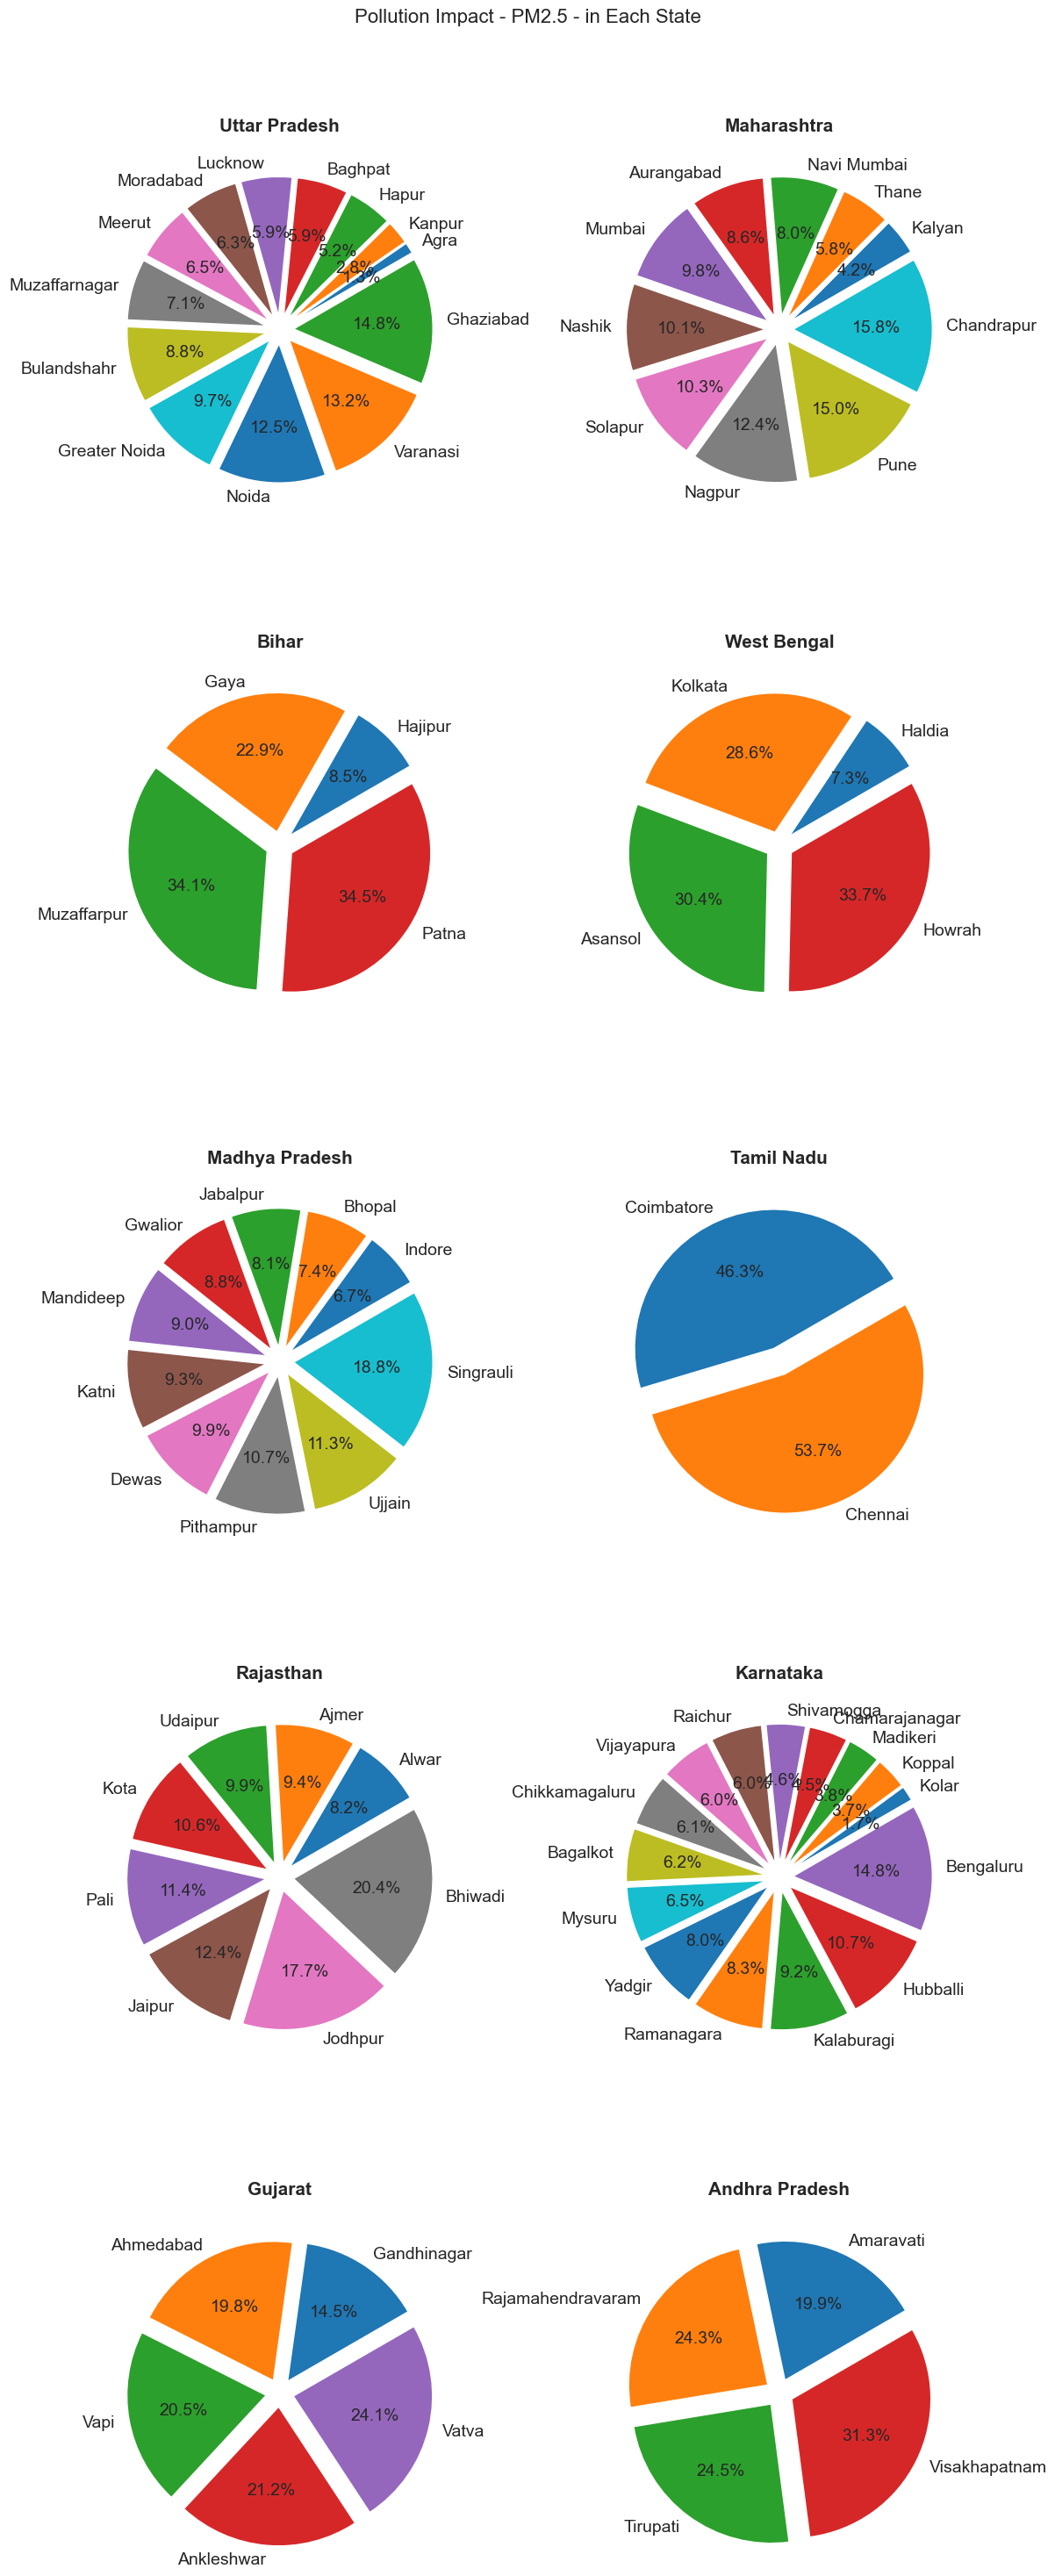

In [21]:
city_impact_pie_plot(master_data, 'PM2.5')

The top 2 or 3 polluted city from each state with respect to particulate matter are - 

* UP - Ghaziabad, Varanasi, Noida
* Maharashtra - Chandrapur, Pune, Nagpur
* Bihar - Patna, Muzaffarpur, Gaya
* West Bengal - Howrah, Asansol, Kolkata
* Madhya Pradesh - Singrauli, Ujjain, Pithampur
* Tamil Nadu - Chennai, Coimbatore
* Rajasthan - Bhiwadi, Jodhpur, Jaipur
* Karnataka - Bengaluru, Hubballi, Kalaburagi
* Gujarat - Vatva, Ankleshwar, Vapi
* AP - Visakhapatnam, Tirupati, Rajamahendravaram

**Percentage of CO contribution from each city in the state**

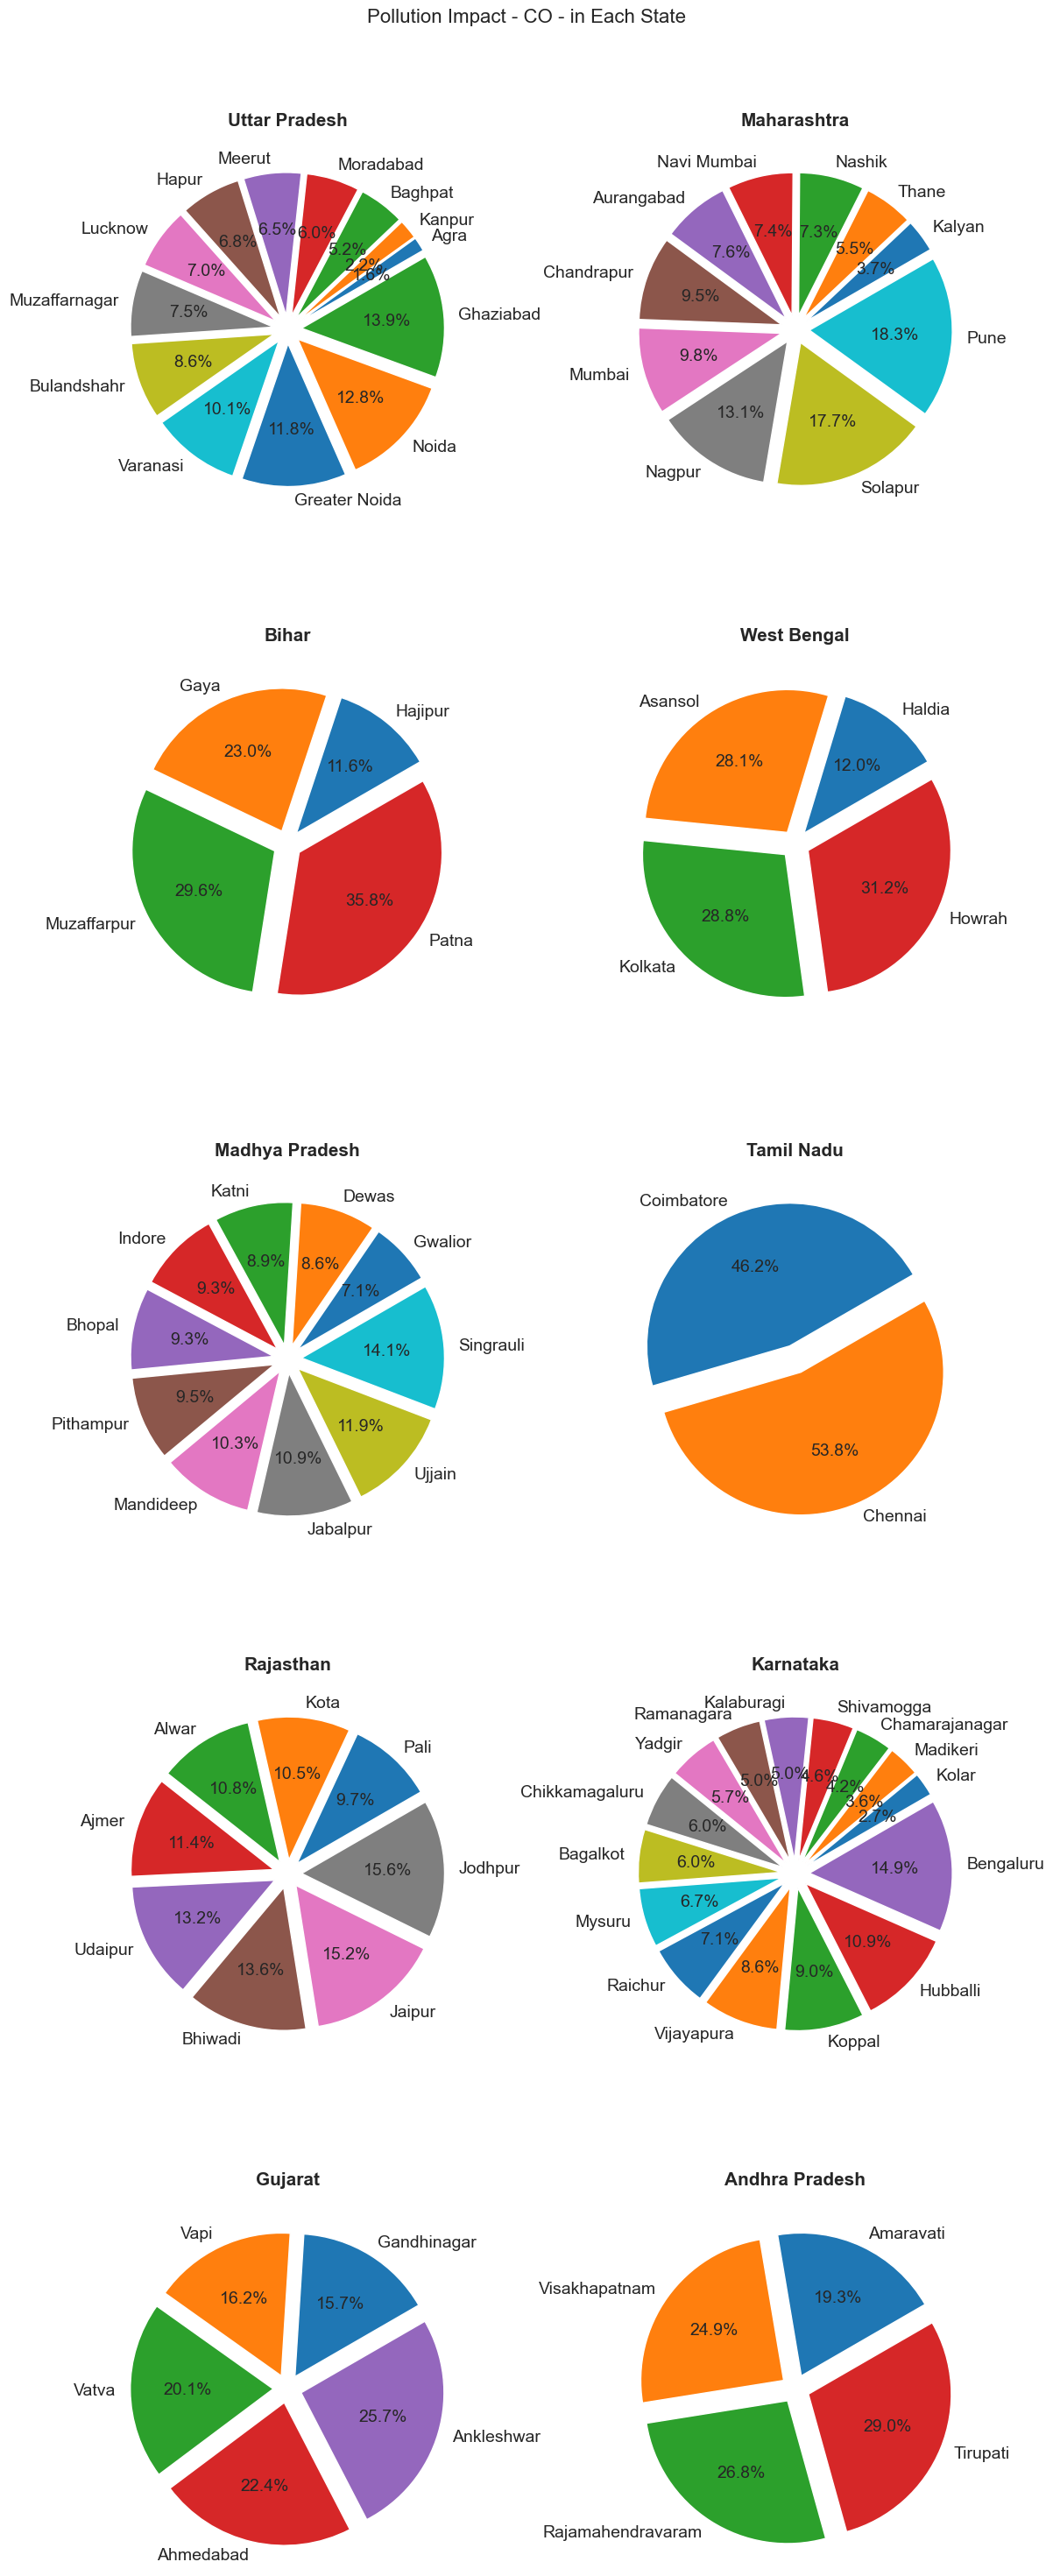

In [22]:
city_impact_pie_plot(master_data, 'CO')

The top 2 or 3 polluted city from each state with respect to CO are - 

* UP - Ghaziabad, Noida, Greater Noida
* Maharashtra - Pune, Solapur, Nagpur
* Bihar - Patna, Muzaffarpur, Gaya
* West Bengal - Howrah, Kolkata, Asansol
* Madhya Pradesh - Singrauli, Ujjain, Jabalpur
* Tamil Nadu - Chennai, Coimbatore
* Rajasthan - Jodhpur, Jaipur, Bhiwadi
* Karnataka - Bengaluru, Hubballi, Koppal
* Gujarat - Ankleshwar, Ahmedabad, Vatva
* AP - Tirupati, Rajamahendravaram, Visakhapatnam

**Percentage of NO2 contribution from each city in the state**

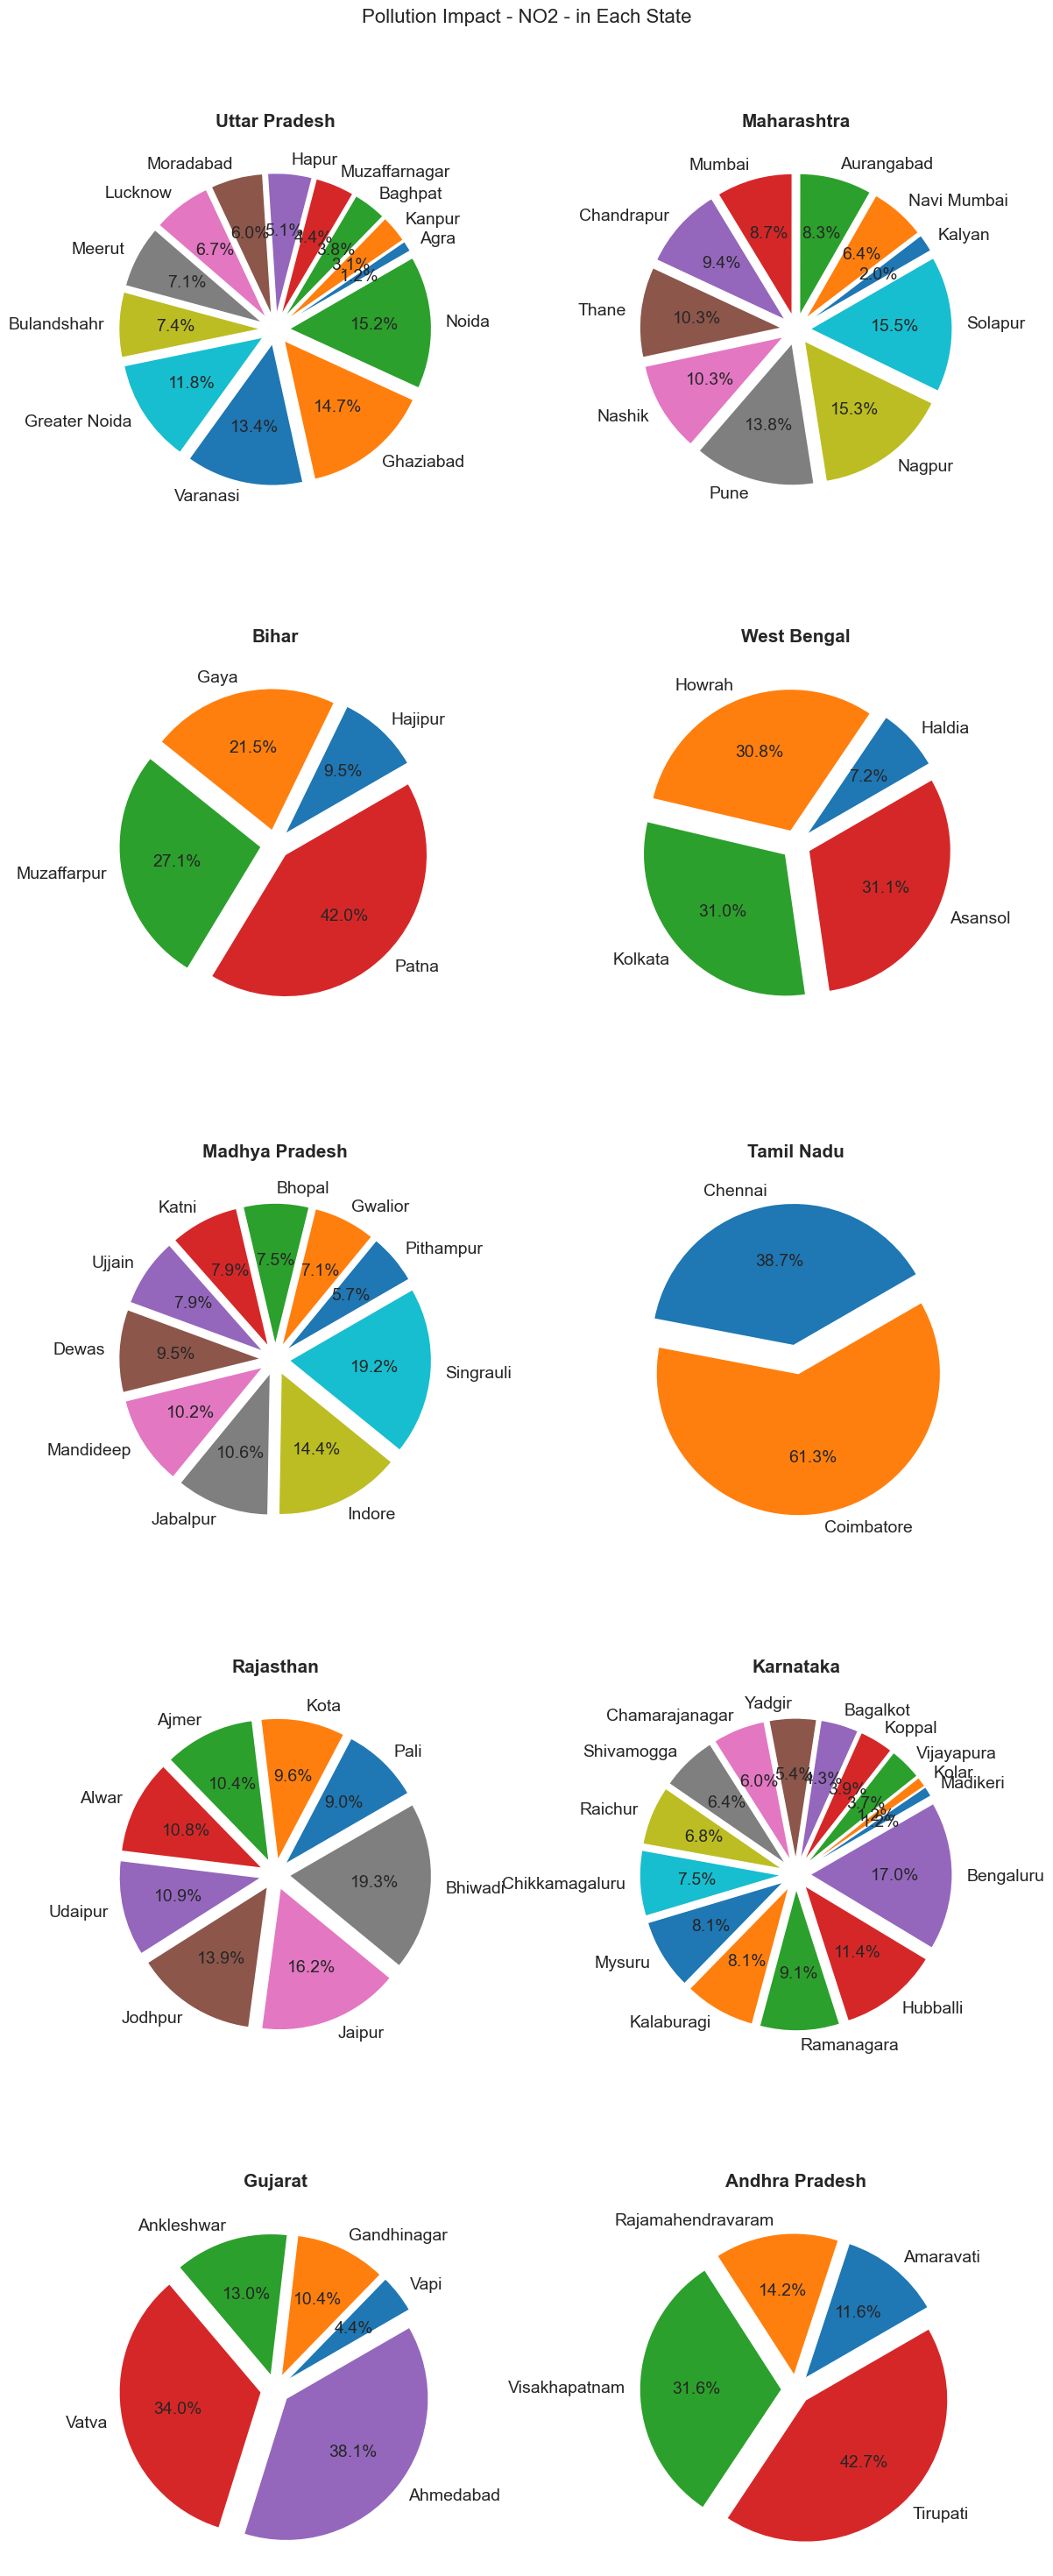

In [23]:
city_impact_pie_plot(master_data, 'NO2')

The top 2 or 3 polluted city from each state with respect to NO2 are - 

* UP - Noida, Ghaziabad, Varanasi
* Maharashtra - Solapur, Nagpur, Pune
* Bihar - Patna, Muzaffarpur, Gaya
* West Bengal - Howrah, Kolkata, Asansol
* Madhya Pradesh - Singrauli, Indore, Jabalpur
* Tamil Nadu - Chennai, Coimbatore
* Rajasthan - Jodhpur, Jaipur, Bhiwadi
* Karnataka - Bengaluru, Hubballi, Ramnagara
* Gujarat - Ankleshwar, Ahmedabad, Vatva
* AP - Tirupati, Rajamahendravaram, Visakhapatnam

**Percentage of SO2 contribution from each city in the state**

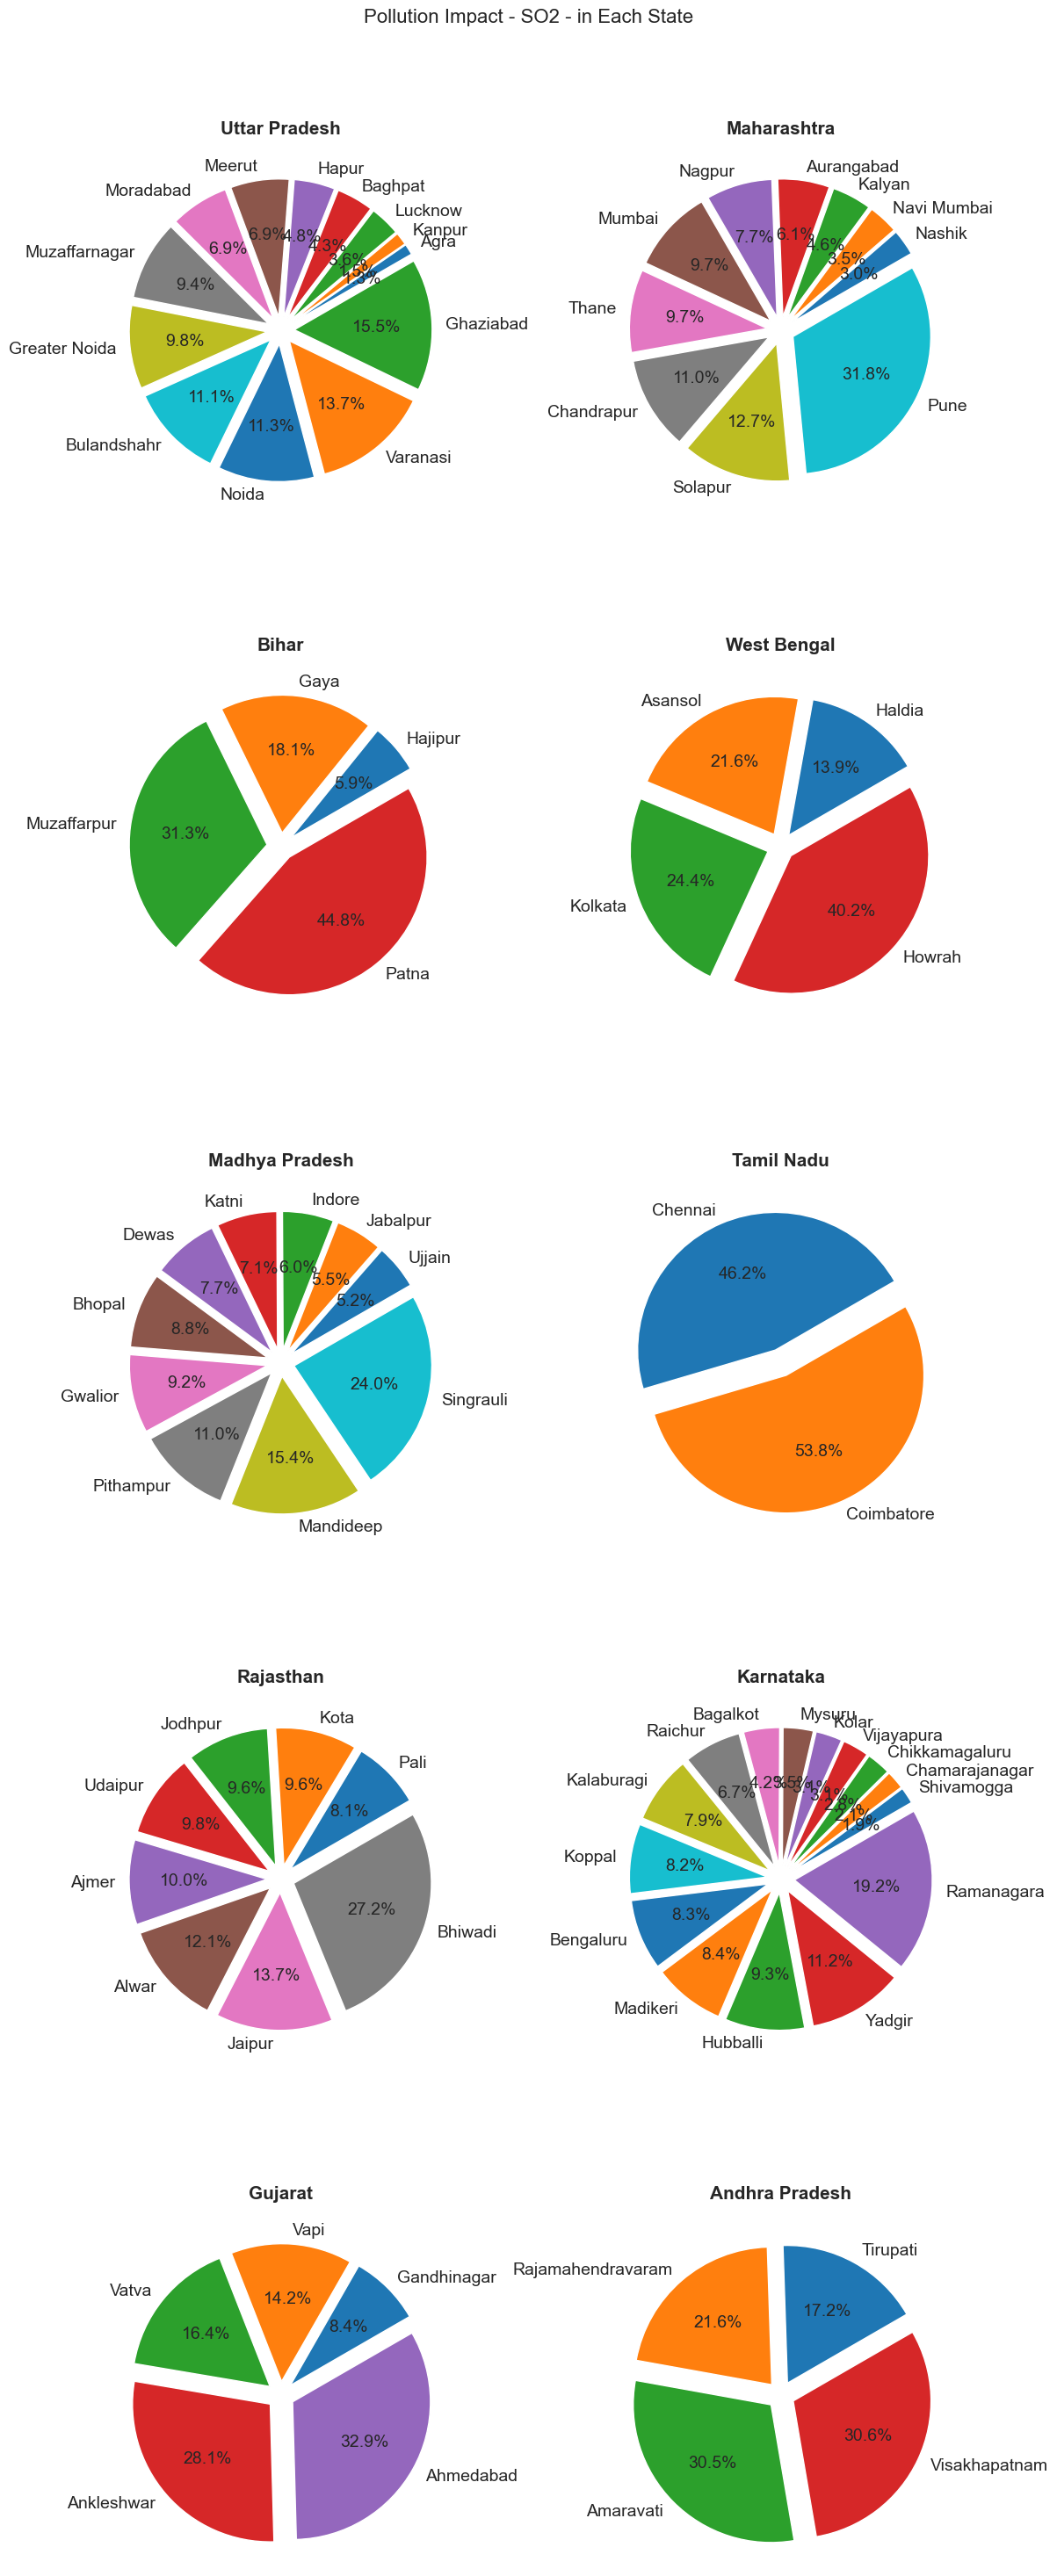

In [24]:
city_impact_pie_plot(master_data, 'SO2')

The top 2 or 3 polluted city from each state with respect to SO2 are - 

* UP - Noida, Ghaziabad, Varanasi
* Maharashtra - Solapur, Pune, Chandrapur
* Bihar - Patna, Muzaffarpur, Gaya
* West Bengal - Howrah, Kolkata, Asansol
* Madhya Pradesh - Singrauli, Mandideep, Pithampur
* Tamil Nadu - Chennai, Coimbatore
* Rajasthan - Jaipur, Bhiwadi, Alwar
* Karnataka - Ramnagara, Yadgir, Hubballi
* Gujarat - Ankleshwar, Ahmedabad, Vatva
* AP - Amaravati, Rajamahendravaram, Visakhapatnam

**The common cities that have high levels of pollution from each state are**

| Uttar Pradesh | Maharashtra | Bihar | West Bengal | Madhya Pradesh |
| --- | --- | --- | --- | --- |
| Ghaziabad | Pune | Patna | Howrah | Singrauli |
| Varanasi | Solapur | Muzaffarpur | Kolkata | Ujjain |
| Noida |  | Gaya | Asansol | Jabalpur |

| Tamil Nadu | Rajasthan | Karnataka | Gujarat | Andhra Pradesh |
| --- | --- | --- | --- | --- |
| Chennai | Bhiwandi | Bengaluru | Ahmedabad | Vishakapatnam |
| Coimbatore | Jodhpur | Hubbali | Vatva | Rajamahendravarm |
| | Jaipur | | Ankhleshwar | |

Now that I have identified the top polluted cities in each state - I shall reduce my exploratory analysis to these cities. 

In [25]:
cities_of_interest = {
    'Uttar Pradesh': ['Ghaziabad', 'Varanasi', 'Noida'],
    'Maharashtra': ['Chandrapur', 'Pune', 'Solapur'],
    'Bihar': ['Patna', 'Muzaffarpur', 'Gaya'],
    'West Bengal': ['Howrah', 'Kolkata', 'Asansol'],
    'Madhya Pradesh': ['Singrauli', 'Ujjain', 'Jabalpur', 'Pithampur'],
    'Tamil Nadu': ['Chennai', 'Coimbatore'],
    'Rajasthan': ['Bhiwandi', 'Jodhpur', 'Jaipur'],
    'Karnataka': ['Bengaluru', 'Hubbali'],
    'Gujarat': ['Ahmedabad', 'Vatva', 'Ankhleshwar'],
    'Andhra Pradesh': ['Vishakapatnam', 'Rajamahendravaram']
}

# Create a new reduced master_data dictionary
reduced_master_data = {}

# Iterate over each state and city of interest and extract the corresponding dataframes
for state, cities in cities_of_interest.items():
    if state in master_data:
        reduced_master_data[state] = {}
        for city in cities:
            if city in master_data[state]:
                reduced_master_data[state][city] = master_data[state][city]

**Histogram Distribution for PM2.5 for each state**

In [28]:
from sklearn.preprocessing import MinMaxScaler

def plot_distribution(reduced_master_data, feature_names):
    """
    Plot histograms for each feature on separate subplots for each state.

    Parameters:
    - reduced_master_data (dict): Nested dictionary containing the pollutant levels in the format {state: {city: dataframe}}
    - feature_names (list): List of feature names to plot histograms for
    """
    # Create a MinMaxScaler object
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Define a custom color palette for the features
    color_palette = ['blue']

    # Calculate the number of rows and columns for subplots
    num_states = len(reduced_master_data)
    num_rows = 5
    num_cols = 2

    # Create subplots with adjusted positioning
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 18), sharey=False)
    fig.subplots_adjust(hspace=0.5)

    # Flatten the axes array
    axes = axes.flatten()

    # Iterate over each state in the reduced_master_data dictionary
    for i, (state, cities) in enumerate(reduced_master_data.items()):
        # Select the appropriate subplot
        ax = axes[i]

        # Iterate over each feature and its corresponding color
        for j, feature_name in enumerate(feature_names):
            # Initialize an empty list to store feature values for all cities in the state
            feature_values = []

            # Iterate over each city in the state and append its feature values to the list
            for city_data in cities.values():
                feature_values.extend(city_data[feature_name].tolist())

            # Scale the feature values between 0 and 1
#             scaled_values = scaler.fit_transform(np.array(feature_values).reshape(-1, 1))
            scaled_values = np.array(feature_values).reshape(-1, 1)

            # Plot the histogram using matplotlib directly with the specified color and transparent background
            ax.hist(scaled_values, bins=10, label=feature_name, color=color_palette[j % len(color_palette)],
                    alpha=0.7, edgecolor='black', linewidth=1.2, histtype='bar', fill=True, density=True)

        # Set the title for the subplot
        ax.set_title(state)

        # Set the x-axis label for the subplot
        ax.set_xlabel('PM2.5')

        # Set the y-axis label for the subplot
        ax.set_ylabel('Frequency')

        # Set legend
        ax.legend()

    # Hide any unused subplots
    for j in range(num_states, num_rows * num_cols):
        fig.delaxes(axes[j])

    # Adjust the spacing between subplots
    plt.tight_layout()
    fig.suptitle("Distribution of Pollutant Levels PM2.5 across all States", y=1.02, fontweight='bold')

    # Show the plot
    plt.show()


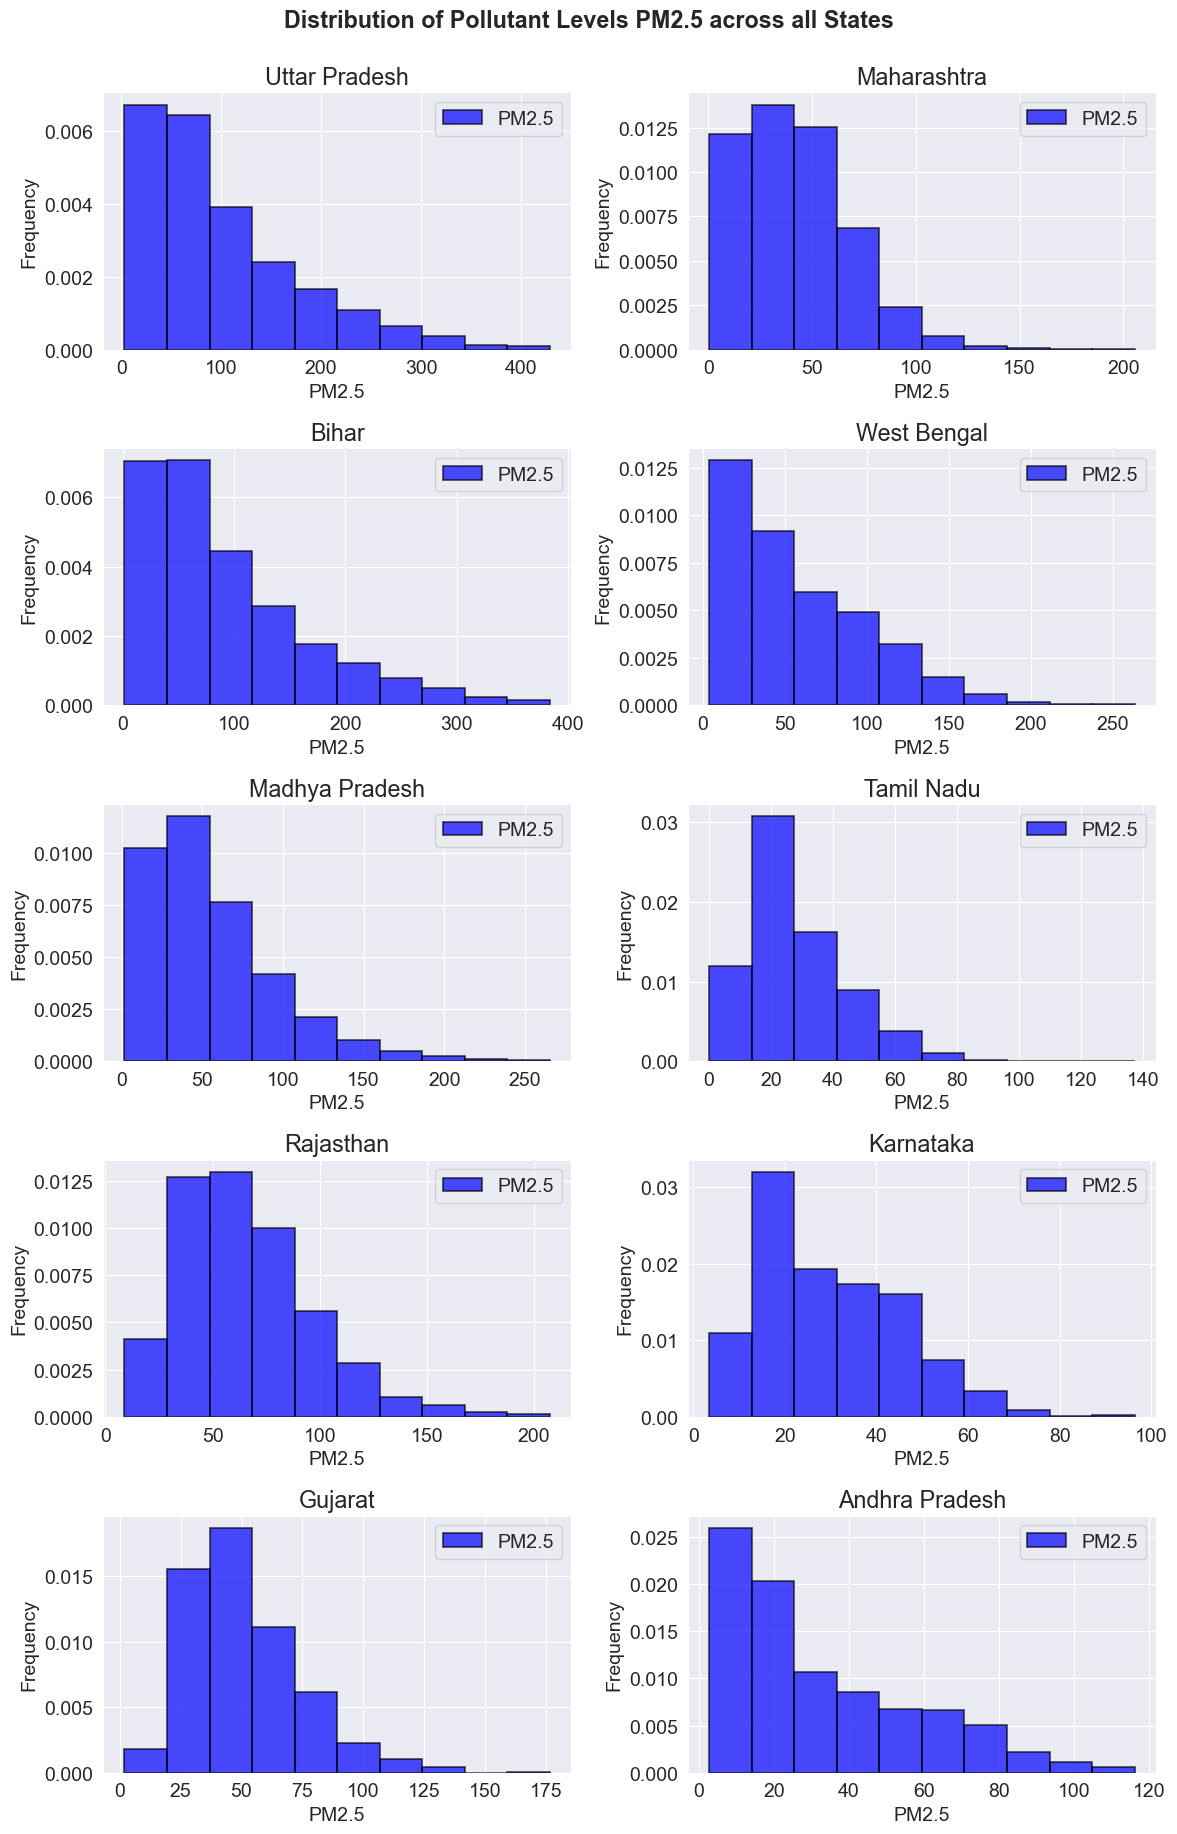

In [29]:
plot_distribution(reduced_master_data, ['PM2.5'])

**Rough range of PM2.5 pollutant for each state** 

- 0 to 100 : Andhra Pradesh, Karnataka, Tamil Nadu
- 0 to 150 : Gujarat, Maharashtra
- 0 to 200 : Rajasthan
- 0 to 250 : Madhya Pradesh, West Bengal
- 0 to 400 : Uttar Pradesh, Bihar

>  Uttar Pradesh is not only the most populated state of India, but it is also the top polluted state. This insight is from the maximum range of values. Bihar is next on the list. 

> The southern states (AP, Karnataka, TN) are less polluted than the northern states.

> Maharashtra being the second most populated state is not that polluted compared to UP and Bihar

> There seems to be a correlation with population - densely populated states tend to be more polluted and since pollution is a consequence of human activity, this claim makes sense. 


In [30]:
def violin_plot_feature(reduced_master_data, feature_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    data = []
    labels = []

    for state, cities in reduced_master_data.items():
        state_data = []
        for city, df in cities.items():
            state_data.extend(df[feature_name])

        data.append(state_data)
        labels.append(state)

    # Calculate the average values for each state
    average_values = [pd.Series(state_data).mean() for state_data in data]
    # Sort the data and labels based on the average values in descending order
    data_sorted, labels_sorted, average_values_sorted = zip(*sorted(zip(data, labels, average_values), key=lambda x: x[2], reverse=True))

    sns.violinplot(data=data_sorted, ax=ax)
    ax.set_xticks(range(len(labels_sorted)))
    ax.set_xticklabels(labels_sorted, rotation=90)
    ax.set_ylabel(feature_name)
    ax.set_title("Violin plot distribution of " + feature_name + " in each state")
    plt.tight_layout()
    plt.show()

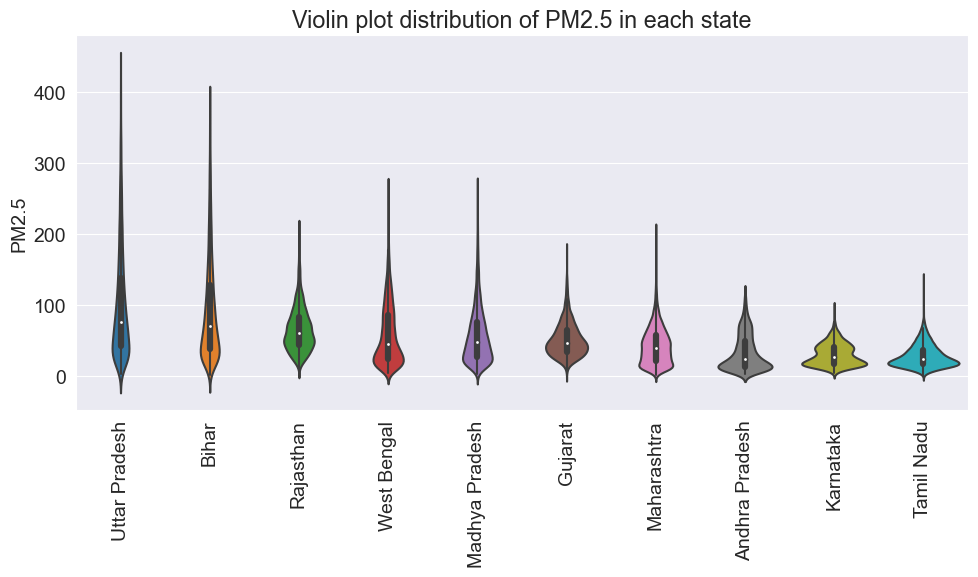

In [32]:
violin_plot_feature(reduced_master_data, 'PM2.5')

The distribution is ordered in decreasing order of PM2.5 pollutants.

> The top 2 states with high levels of PM2.5 are UP and Bihar

> TN and AP have lowers levels of PM2.5

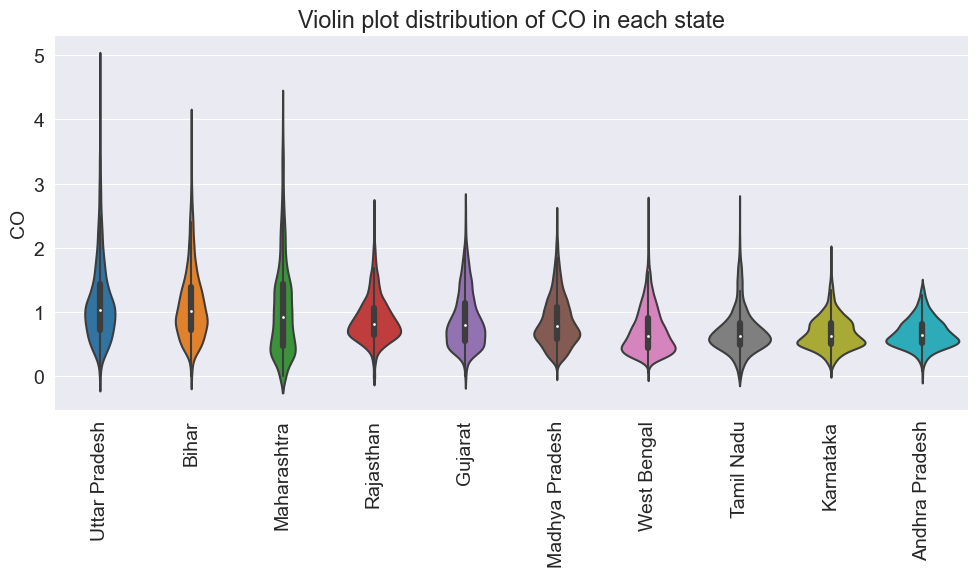

In [33]:
violin_plot_feature(reduced_master_data, 'CO')

> Top 2 states with high levels of CO - UP and Bihar

> Karnataka and AP have low levels of CO

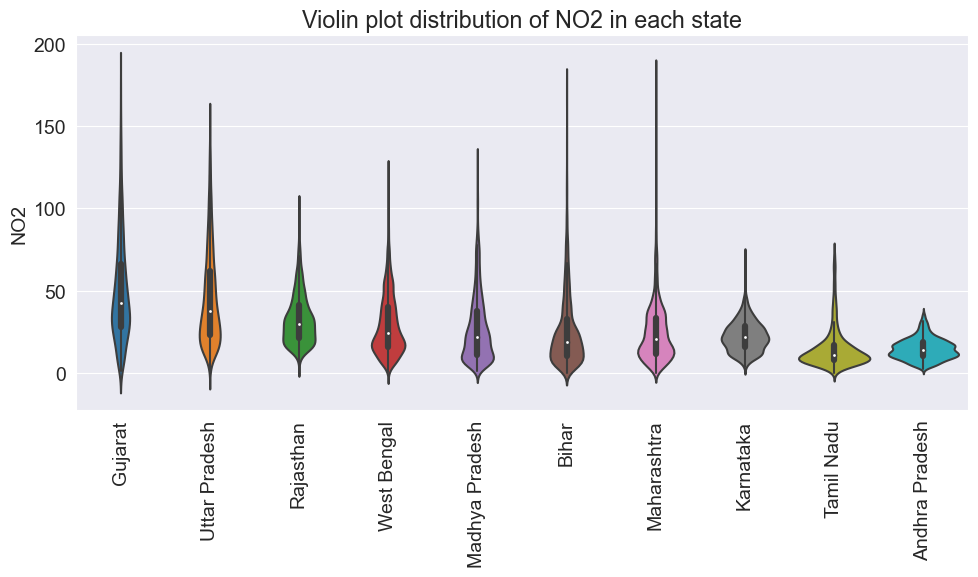

In [34]:
violin_plot_feature(reduced_master_data, 'NO2')

> Gujarat and UP have high levels of NO2 contamination

> TN and Karnatake have low levels of NO2 contamination

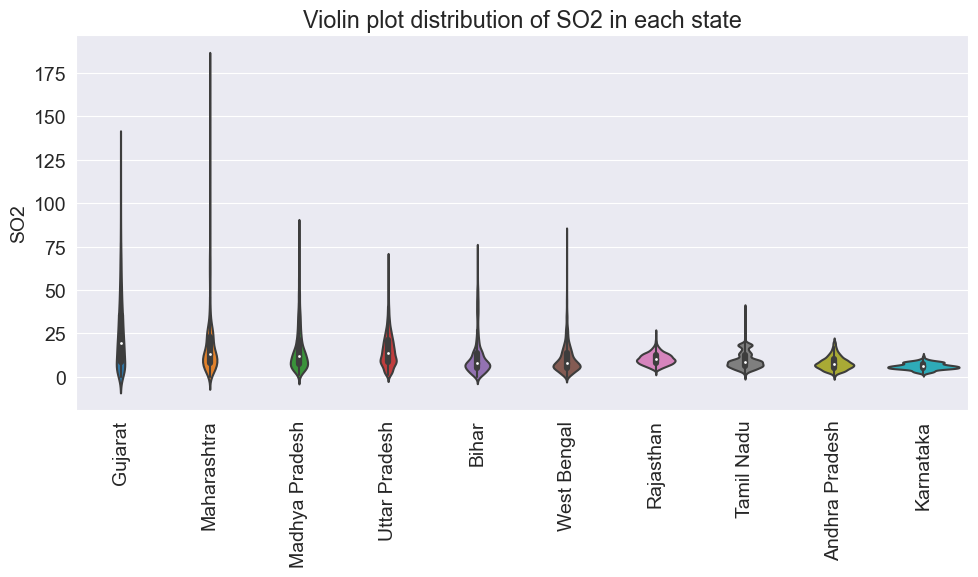

In [35]:
violin_plot_feature(reduced_master_data, 'SO2')

> Gujarat and Maharashtra have high levels of SO2 contamination

> Karnataka and AP have low levels of SO2 contamination

An interesting insight is while **Gujarat** does not exhibit high levels of PM2.5 and CO, it is top on the list wrt SO2 and NO2 pollutants. Recent news have shown that Gujarat has become the most popular manufactoring hub. SO2 and NO2 are primarily released from industrial processes. 

Overall, TN, AP and Karnataka show lesser levels of pollution and UP, Bihar are the top 2 highly polluted states with respect to PM2.5 and CO and Gujarat has the top levels of NO2 and SO2 contaminants.

# Time Series Analysis

**Average values of PM2.5 for each state monthly and yearly**

In [36]:
import calendar

def average_values_plot(reduced_master_data, feature_name, time_unit):
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

    for i, (state, cities) in enumerate(reduced_master_data.items()):
        ax = axs[i // 2, i % 2]  # Access the correct subplot based on i
        for city, df in cities.items():
            if time_unit == 'year':
                df['Time'] = df['Date'].dt.year
            elif time_unit == 'month':
                df['Time'] = df['Date'].dt.month
            else:
                raise ValueError("Invalid time unit. Please choose either 'year' or 'month'.")
            average_feature = df.groupby('Time')[feature_name].mean().reset_index()
            if time_unit == 'month':
                average_feature['Time'] = average_feature['Time'].apply(lambda x: calendar.month_name[x])
            sns.lineplot(data=average_feature, x='Time', y=feature_name, label=city, ax=ax)

        # Set the title and labels for each subplot
        ax.set_title(state)
        ax.set_xlabel(time_unit.capitalize())
        ax.set_ylabel(f'Average {feature_name} Value')

        if time_unit == 'month':
            ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for month names

    # Set the overall title
    fig.suptitle(f'Average {feature_name} Values Throughout the {time_unit.capitalize()} for All States')

    # Show the legend outside the plot
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

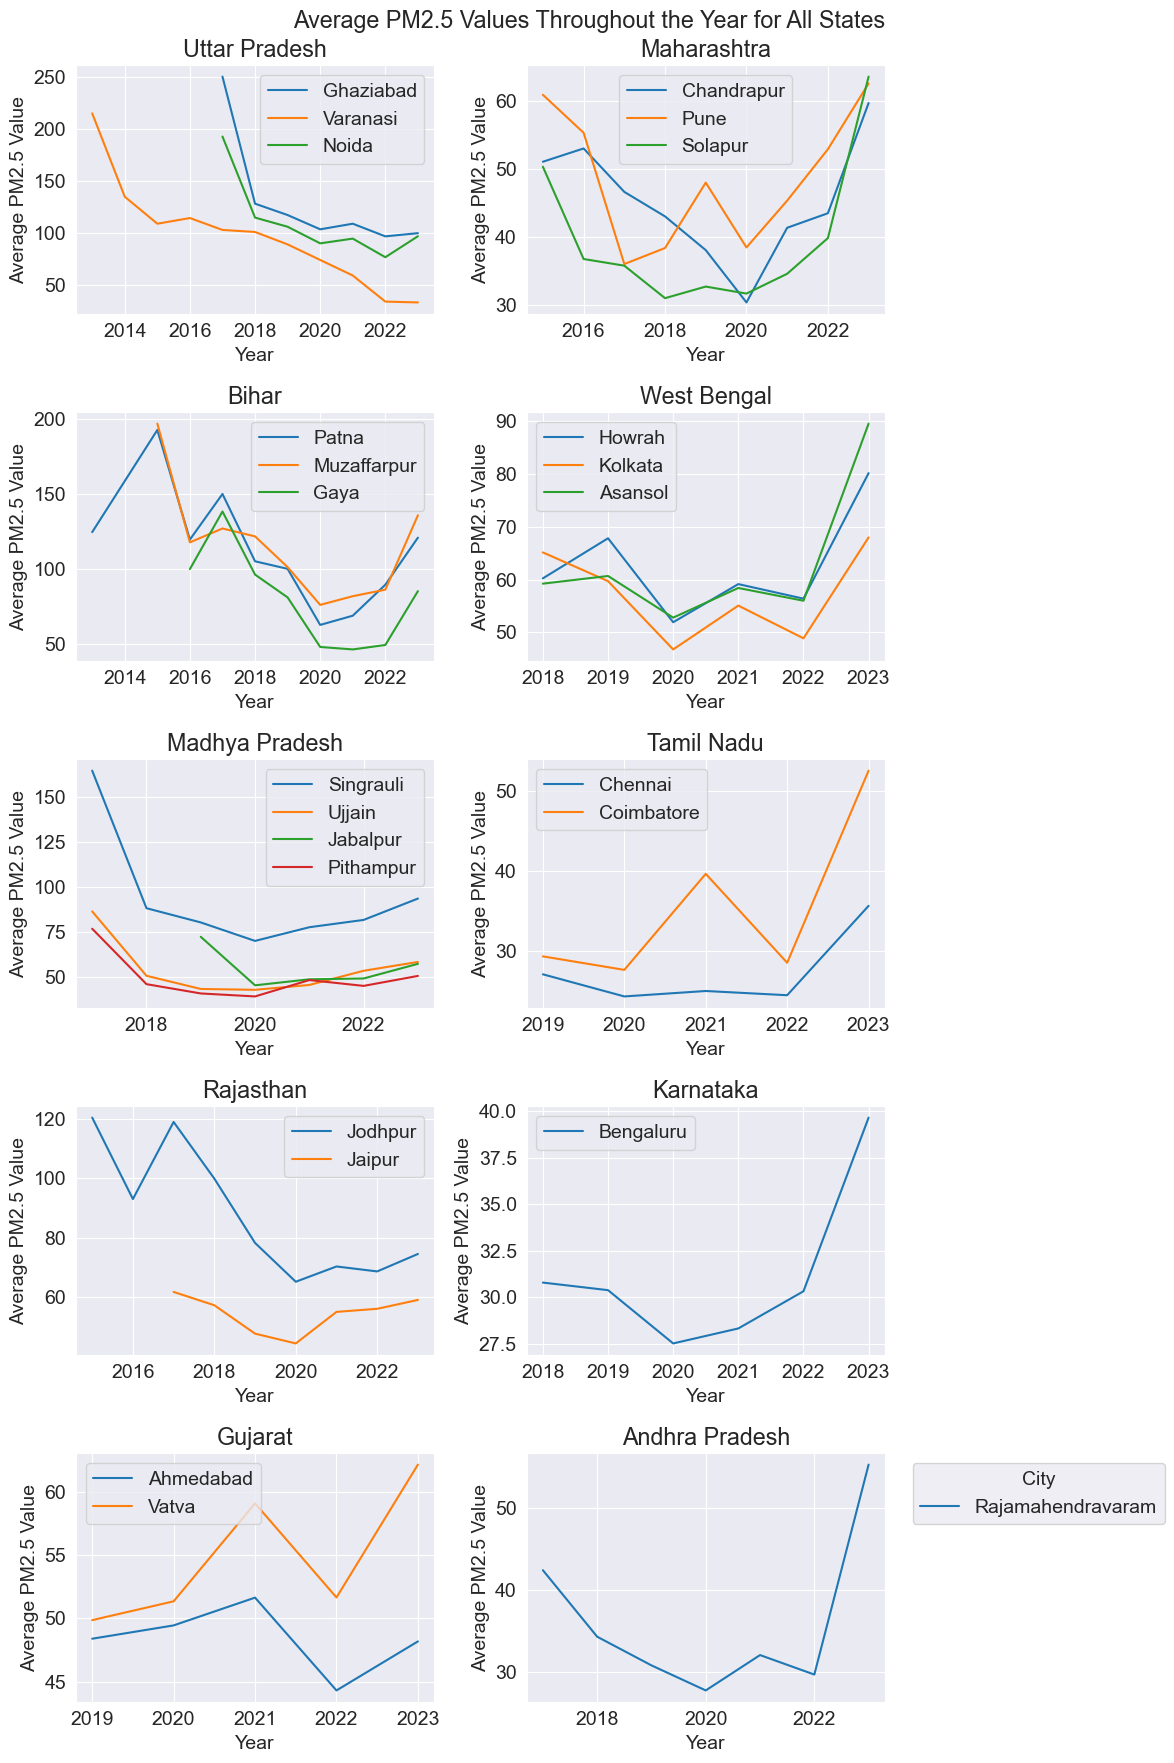

In [37]:
# average_values_plot(reduced_master_data, 'PM2.5', 'year')
average_values_plot(reduced_master_data, 'PM2.5', 'year')

**Yearly Trends in Levels of Pollutants (PM2.5)**

> While UP is the most polluted state of India, there is an interesting insight here - the pollution levels of UP has been showing a decreasing trend (I think I know why but don't want to get political)

> Most of the states have shown a dip around the year 2020 - it is known the pollution levels dropped significantly during the pandemic 

> Pollution levels then seem to be increasing - a sign of normalcy for humans but not for the environment

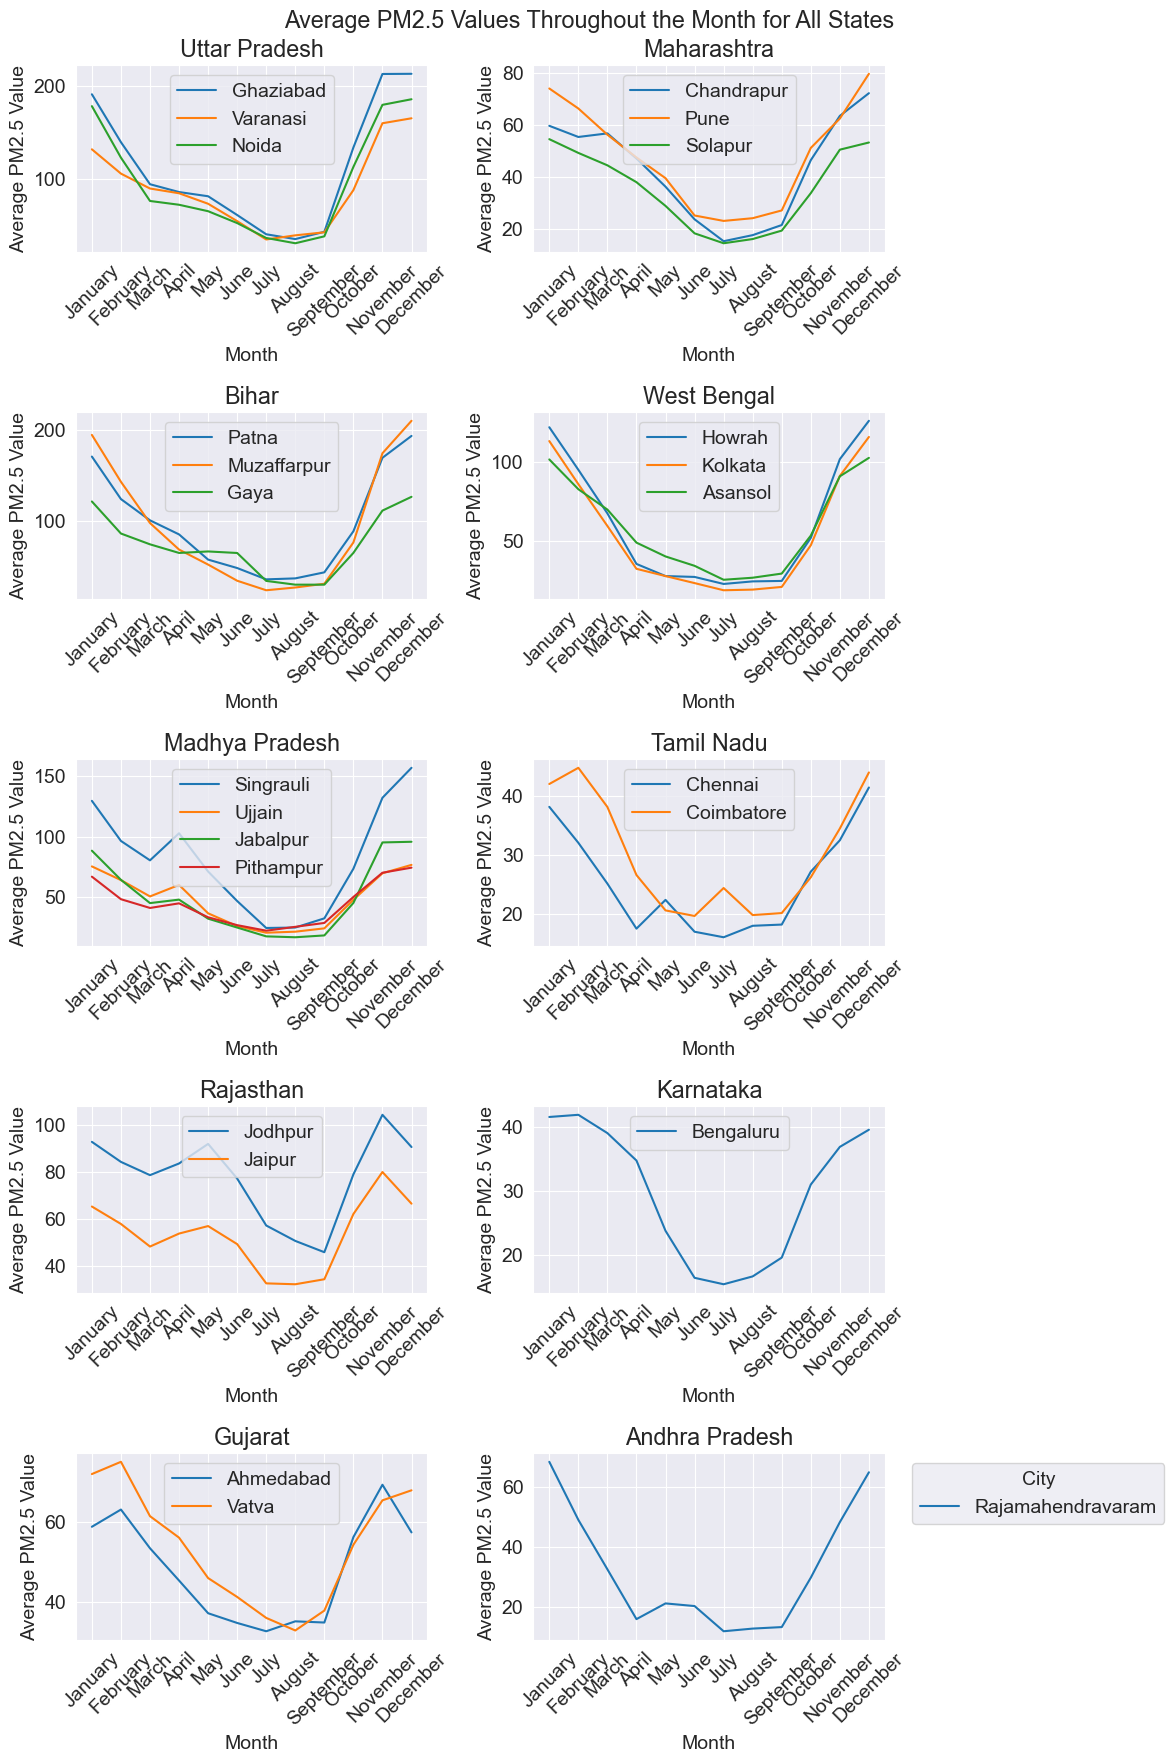

In [38]:
average_values_plot(reduced_master_data, 'PM2.5', 'month')

**Monthly trends in pollution**

> All the states show a similar trend in pollutant levels with respect to time of the year - the pollution levels increase significantly during the winter months which can be attributed to the formation of smog/fog

> Pollutant levels undergo a dip during the summer months

# Multi-variate analysis

In [39]:
def correlation_heatmap(reduced_master_data):
    # Concatenate all city data into a single DataFrame
    all_data = pd.concat([pd.concat(cities.values()) for cities in reduced_master_data.values()])

    # Select the specific air quality parameters of interest
    air_quality_params = ['PM2.5', 'PM10','Ozone','CO', 'SO2', 'NO2']
    selected_data = all_data[air_quality_params]

    # Compute the correlation matrix
    corr_matrix = selected_data.corr()

    # Create a mask to visualize only the upper triangular part of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create a diverging color map
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Create a heatmap with masked values
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, square=True)

    # Set the title
    plt.title('Correlation Heatmap of Air Quality Parameters')

    # Display the plot
    plt.show()

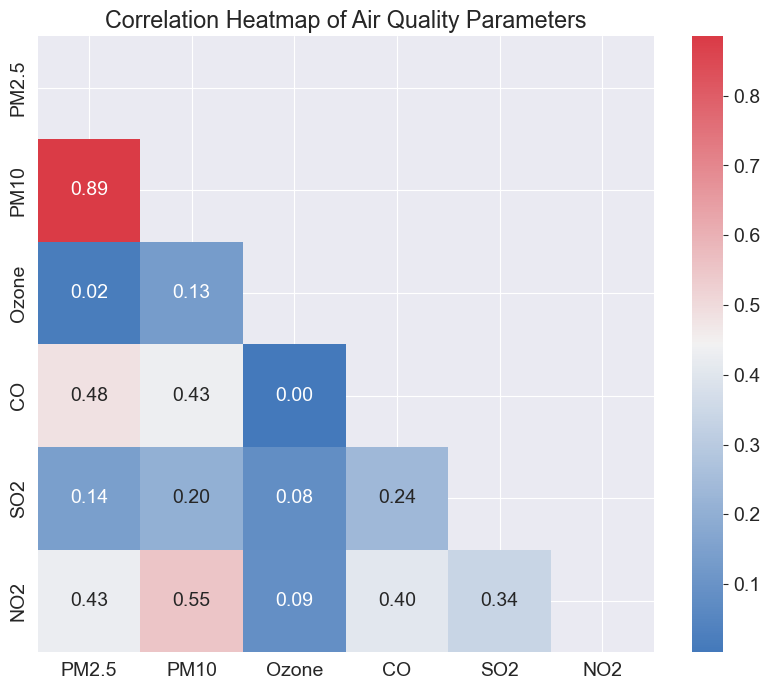

In [40]:
correlation_heatmap(reduced_master_data)

**Pollutant Correlation**

> PM2.5 has a relatively higher correlation with PM10 (understandable because both are particulate matter), followed up CO and NO2

> Ozone does not seem to have a correlation with any of the other parameters and so I shall no longer focus on this

I shall now take into consideration pollutants PM2.5, CO, NO2 and SO2 for further analysis

# 5.  ASK & ANSWER QUESTIONS

### 1) What is the Air Quality Index (AQI) of each state?

The AQI calculation varies depending on the country or region. In general, the process involves the following steps:

- Identify the pollutants: Determine the specific pollutants for which you want to calculate the AQI. For example, PM2.5

- Convert pollutant concentrations to AQI values: Use the pollutant concentrations and apply the corresponding conversion equations or tables provided by the air quality monitoring agency. These equations or tables map pollutant concentrations to AQI values based on breakpoints or standards.

- Calculate sub-indices: Calculate sub-indices for each pollutant based on their respective AQI values. The sub-indices represent the air quality level for each pollutant.

- Determine the overall AQI: Determine the overall AQI by selecting the highest sub-index among all pollutants. This highest sub-index represents the overall air quality level for a given location.


In [41]:
def calculate_aqi(pm25_concentration):
    breakpoints = [0, 12, 35.4, 55.4, 150.4, 250.4, 350.4, 500.4]
    aqi_values = [0, 50, 100, 150, 200, 300, 400, 500]

    aqi = np.zeros_like(pm25_concentration)  # Initialize AQI array

    for i, pm25 in enumerate(pm25_concentration):
        pm25 = np.clip(pm25, breakpoints[0], breakpoints[-1])
        index = np.searchsorted(breakpoints, pm25)

        if index == 0:
            aqi[i] = 0
        elif index == len(breakpoints):
            aqi[i] = 500
        else:
            bp_low, bp_high = breakpoints[index - 1], breakpoints[index]
            aqi_low, aqi_high = aqi_values[index - 1], aqi_values[index]
            aqi[i] = ((aqi_high - aqi_low) / (bp_high - bp_low)) * (pm25 - bp_low) + aqi_low

    return aqi

def calculate_aqi_for_state(state_data):
    pollutant_data = state_data.values()  # Assuming the pollutant data is stored as values in the state_data dictionary
    aqi_values = []

    for pollutant in pollutant_data:
        if 'PM2.5' in pollutant:  # Calculate AQI for PM2.5
            pm25_concentration = pollutant['PM2.5']
            aqi = calculate_aqi(pm25_concentration)
            aqi_values.extend(aqi)

    state_aqi = round(np.max(aqi_values))  # Use the maximum AQI value among all pollutants for the state

    return state_aqi

state_aqi_values = {}

# Iterate over the reduced_master_data dictionary
for state, cities in reduced_master_data.items():
    state_aqi = calculate_aqi_for_state(cities)
    state_aqi_values[state] = state_aqi

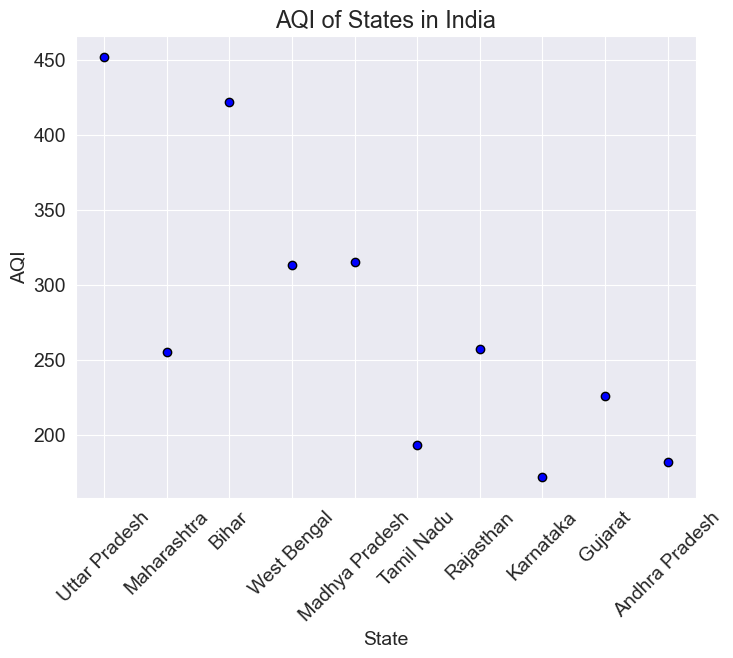

In [42]:
state_names = list(state_aqi_values.keys())
population = list(state_aqi_values.values())

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(state_names, population, c='blue', edgecolors='black')

# Set the axis labels and title
plt.xlabel('State')
plt.ylabel('AQI')
plt.title('AQI of States in India')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [43]:
# Print the AQI values for each state
for state, aqi in state_aqi_values.items():
    print(f"State: {state}, AQI: {aqi}")

State: Uttar Pradesh, AQI: 452
State: Maharashtra, AQI: 255
State: Bihar, AQI: 422
State: West Bengal, AQI: 313
State: Madhya Pradesh, AQI: 315
State: Tamil Nadu, AQI: 193
State: Rajasthan, AQI: 257
State: Karnataka, AQI: 172
State: Gujarat, AQI: 226
State: Andhra Pradesh, AQI: 182


### 2) Which state has best air quality index and which state has the worst?

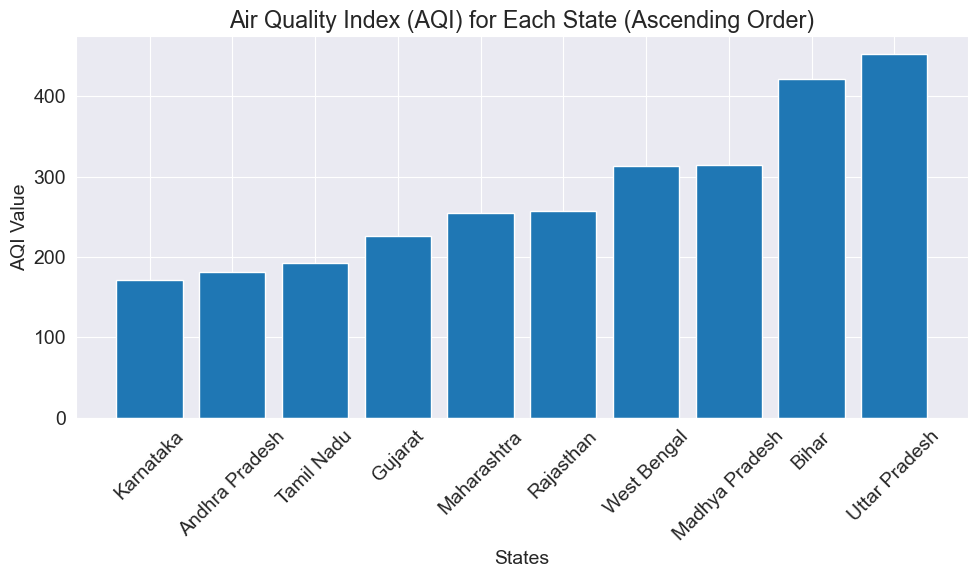

In [44]:
# Sort the state_aqi_values dictionary by values in ascending order
sorted_states = sorted(state_aqi_values, key=state_aqi_values.get)

# Extract the sorted states and corresponding AQI values
states = [state for state in sorted_states]
aqi_values = [state_aqi_values[state] for state in sorted_states]

# Plot the AQI values as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(states, aqi_values)

# Add labels and title
plt.xlabel('States')
plt.ylabel('AQI Value')
plt.title('Air Quality Index (AQI) for Each State (Ascending Order)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

> **Andhra Pradesh has the best AQI and UP has the worst AQI**

Use cases: If I were to chose a state to live, I would either go ahead with AP, Karnatake or TN (the beaches are a big plus point)

### 3) Does AQI trend with population of the state?

From [Census 2011](https://www.adda247.com/defence-jobs/largest-state-in-india-by-population/), the population of top 10 highly populated states are:

<img src="https://imgur.com/X8x7XMu.png" width="600" height="300">

In [45]:
aqi_pop_dict = {"State": ['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Madhya Pradesh', 'Tamil Nadu', 
         'Rajasthan', 'Karnataka', 'Gujarat', 'Andhra Pradesh'],
               "Population":[199812341, 112372972, 103804637, 91347736, 72597565, 72138956, 68621012, 61130704, 60383628, 49286799],
               "AQI": [452,255,422,313,315,193,257,172,226,166]}
aqi_pop_df = pd.DataFrame(aqi_pop_dict)
aqi_pop_df

State  Population  AQI
0   Uttar Pradesh   199812341  452
1     Maharashtra   112372972  255
2           Bihar   103804637  422
3     West Bengal    91347736  313
4  Madhya Pradesh    72597565  315
5      Tamil Nadu    72138956  193
6       Rajasthan    68621012  257
7       Karnataka    61130704  172
8         Gujarat    60383628  226
9  Andhra Pradesh    49286799  166

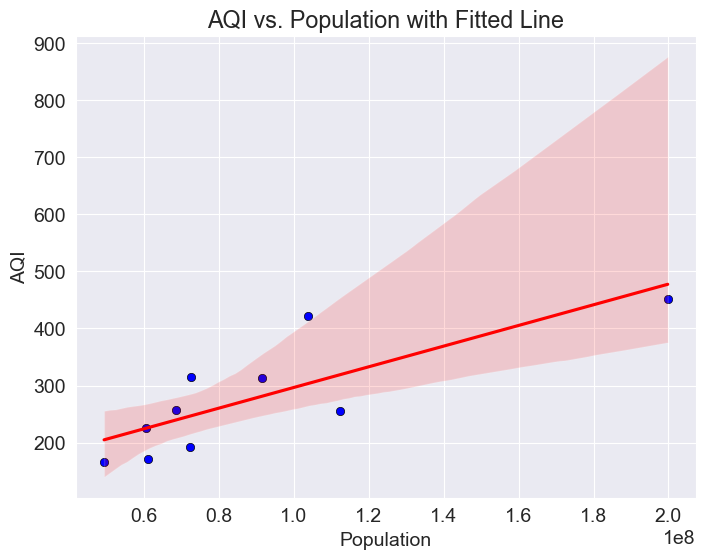

Root Mean Squared Error (MSE): 56.57151430207047


In [46]:
# Scatter plot of AQI vs. Population
plt.figure(figsize=(8, 6))
sns.scatterplot(data=aqi_pop_df, x='Population', y='AQI', color='blue', edgecolor='black')

# Fit a line to the scatter plot
sns.regplot(data=aqi_pop_df, x='Population', y='AQI', color='red', scatter=False)

# Calculate residuals
predicted_aqi = np.polyval(np.polyfit(aqi_pop_df['Population'], aqi_pop_df['AQI'], 1), aqi_pop_df['Population'])
residuals = aqi_pop_df['AQI'] - predicted_aqi

# Set the axis labels and title
plt.xlabel('Population')
plt.ylabel('AQI')
plt.title('AQI vs. Population with Fitted Line')

# Show the plot
plt.show()

# Calculate the mean squared error (MSE) of the fit
rmse = np.sqrt(np.mean(residuals**2))
print("Root Mean Squared Error (MSE):", rmse)

In [47]:
correlation = aqi_pop_df['Population'].corr(aqi_pop_df['AQI'])
correlation_percentage = correlation**2 * 100
print("Correlation between Population and AQI:", correlation_percentage)

Correlation between Population and AQI: 63.746617400142426


> **There seems to be a 63% correlation between population and AQI** which suggests that highly populated states tend to have a higher AQI. The RMSE of the fit is 56. AQI would be dependent on several other factors such as location, industries and combustion processes and other human activity that leads to release of pollutants. 

### 4) What is the correlation between the different pollutants? What could be the reason for the strong/weak correlation?

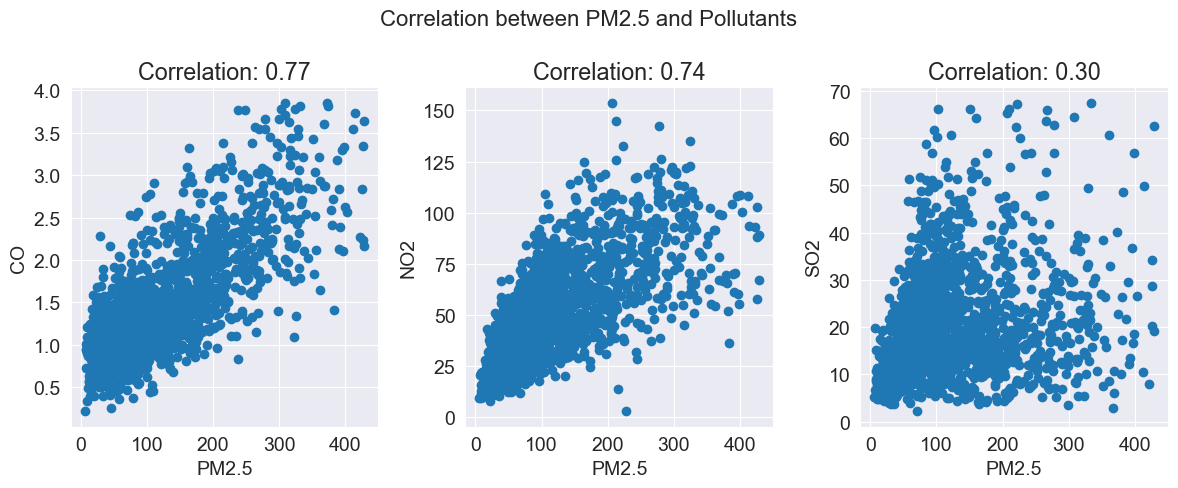

In [48]:
def plot_scatter_with_correlation():
    pollutants = ['CO', 'NO2', 'SO2']
    fig, axes = plt.subplots(1,3, figsize=(12, 5))
    fig.suptitle('Correlation between PM2.5 and Pollutants', fontsize=16)
    axes = axes.flatten()

    for i, pollutant in enumerate(pollutants):
        feature1_values = []
        feature2_values = []
        for cities in reduced_master_data.values():
            for data in cities.values():
                value1 = data['PM2.5']
                value2 = data[pollutant]
                feature1_values.append([val for val in value1])
                feature2_values.append([val for val in value2])

        # Calculate correlation
        correlation = np.corrcoef(feature1_values[0], feature2_values[0])[0, 1]
        axes[i].scatter(feature1_values[0], feature2_values[0])
        axes[i].set_xlabel('PM2.5')
        axes[i].set_ylabel(pollutant)
        axes[i].set_title(f'Correlation: {correlation:.2f}')
        axes[i].grid(True)

    # Remove empty subplot if there are fewer than 4 pollutants
    if len(pollutants) < 3:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

plot_scatter_with_correlation()


**There seems to be a high correlation between PM2.5 & CO and PM2.5 and NO2.**

> PM2.5, CO and NO2 can have common emission sources. For example, combustion processes, including vehicle exhaust, industrial emissions, and residential heating, can release PM2.5, CO and NO2 into the air. If an area has significant pollution sources that emit PM2.5, CO and NO2, it can result in a high correlation between the two pollutants.

**The correlation between PM2.5 and SO2 is weaker compared to other pollutants**

> PM2.5 and SO2 have different primary sources of emissions. PM2.5 is primarily generated from combustion processes, industrial emissions, vehicle exhaust, and various other sources of particulate matter. On the other hand, SO2 is mainly produced by burning fossil fuels, especially coal and oil, in power plants, industrial facilities, and residential heating systems. Since their primary emission sources are different, the correlation between PM2.5 and SO2 levels can be relatively low.

### 5) What is the rank of cities with respect to particulate matter pollutant?

In [56]:
def plot_cities_increasing_order(reduced_data, pollutant):
    city_levels = []

    for state, cities in reduced_data.items():
        for city, data in cities.items():
            max_level = data[pollutant].max()
            city_levels.append((city, max_level))

    city_levels.sort(key=lambda x: x[1])  # Sort the city levels by increasing pollutant value
    cities = [city for city, _ in city_levels]
    levels = [level for _, level in city_levels]

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(f'{pollutant} Levels in Cities (Increasing Order)', fontsize=16)

    sns.barplot(x=levels, y=cities, ax=ax)
    ax.set_xlabel(pollutant)
    ax.set_ylabel('Cities')
    ax.grid(True)
    ax.tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.show()

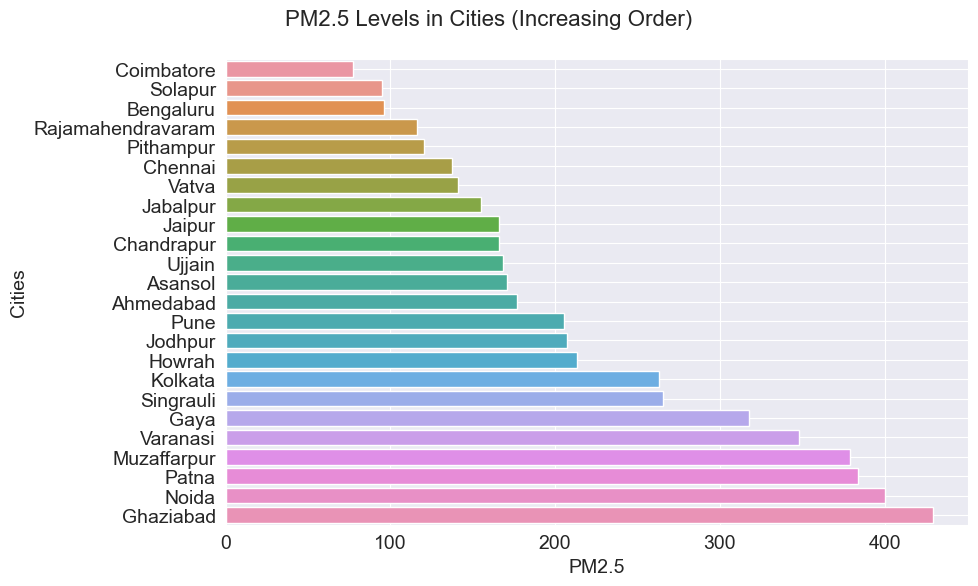

In [57]:
pollutants = 'PM2.5'
plot_cities_increasing_order(reduced_master_data, pollutants)

> Coimbatore and Solapur have the best air quality

> Noida and Ghaziabad have the worst air quality

### 6) What is the rank of cities with respect to SO2 pollution?

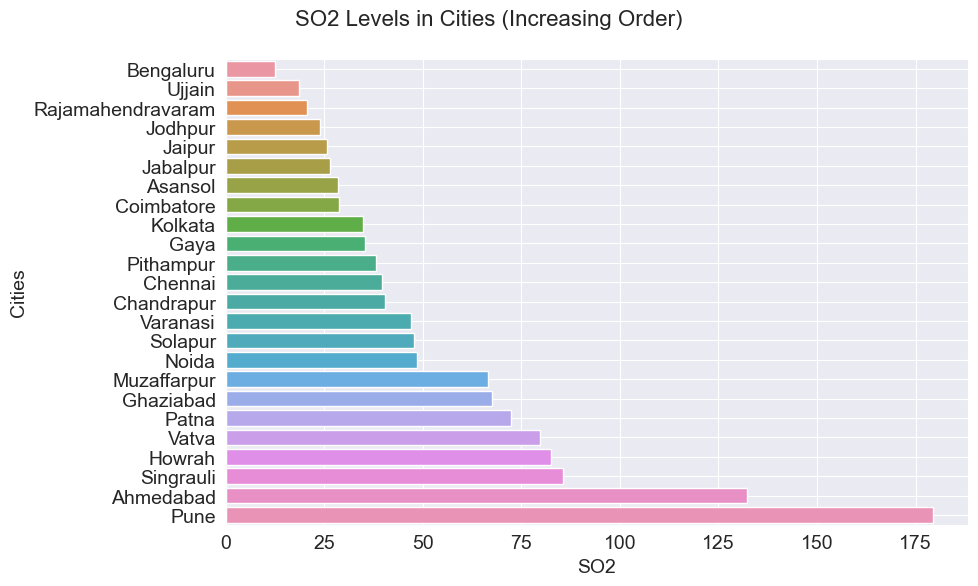

In [58]:
pollutant = 'SO2'
plot_cities_increasing_order(reduced_master_data, pollutant)

> Ahmedabad and Pune show high levels of SO2 emissions - Gujarat and Maharashtra are hubs for manufacturing

> Bengaluru and Ujjain have least amounts of SO2 emissions

### 7) Does Delhi meet the national air quality standards?

In [60]:
delhi_data = delhi_data['Delhi']

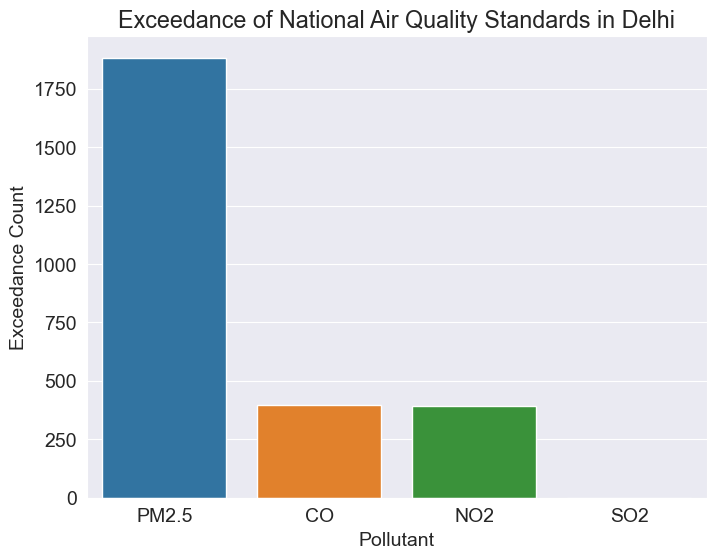

In [64]:
pollutants = ['PM2.5', 'CO', 'NO2', 'SO2']
national_standards = {
    
    'PM2.5': 60,  # example value, please provide the actual standard
    'CO': 2,      # example value, please provide the actual standard
    'NO2': 80,    # example value, please provide the actual standard
    'SO2': 80,    # example value, please provide the actual standard
    'Ozone': 100  # example value, please provide the actual standard
}

exceedance_count = {}
for pollutant in pollutants:
    exceedance_count[pollutant] = (delhi_data[pollutant] > national_standards[pollutant]).sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=list(exceedance_count.keys()), y=list(exceedance_count.values()))
plt.xlabel('Pollutant')
plt.ylabel('Exceedance Count')
plt.title('Exceedance of National Air Quality Standards in Delhi')
plt.show()

> No, it does not. Delhi has been repeatedly recording high levels of particulate matter (about 2000 times it exceeded the national average)

### 8) How does the pollution levels of Delhi (the most union territory) compare with Uttar Pradesh (the most polluted state)?

In [65]:
delhi_averages = delhi_data.mean(numeric_only=True)

data = reduced_master_data['Uttar Pradesh']
# Data for Uttar Pradesh (Varanasi and Noida)
up_data_ghaziabad = data['Ghaziabad']
up_data_varanasi = data['Varanasi']
up_data_noida = data['Noida']
up_data_combined = pd.concat([up_data_ghaziabad, up_data_varanasi, up_data_noida], ignore_index=True)
up_averages = up_data_combined.mean(numeric_only=True)

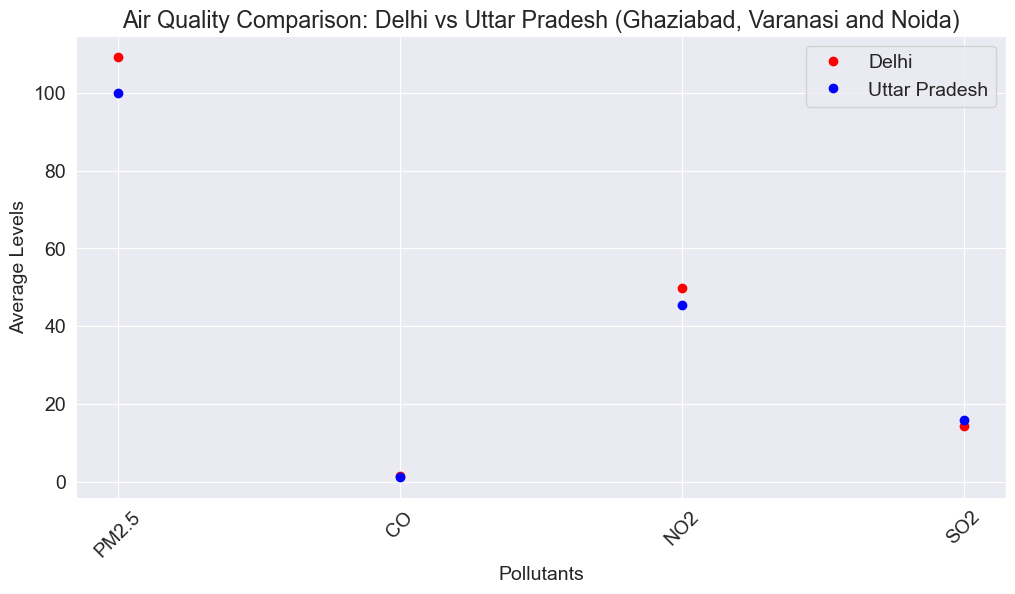

In [66]:
pollutants = ['PM2.5', 'CO', 'NO2', 'SO2']

# Plot the comparison
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    plt.plot([pollutant], [delhi_averages[pollutant]], 'ro', label='Delhi' if pollutant == pollutants[0] else '')
    plt.plot([pollutant], [up_averages[pollutant]], 'bo', label='Uttar Pradesh' if pollutant == pollutants[0] else '')

plt.xlabel('Pollutants')
plt.ylabel('Average Levels')
plt.title('Air Quality Comparison: Delhi vs Uttar Pradesh (Ghaziabad, Varanasi and Noida)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

> Delhi shows higher pollutant level averages than the average levels of the entire state of UP! Delhi is the capital city of India and has a significantly higher population density compared to most cities in UP. The high concentration of people in a limited area leads to increased emissions from various sources, including vehicles, industries, and households, contributing to higher pollution levels.

### 9) What is the severity of pollution in all the states?

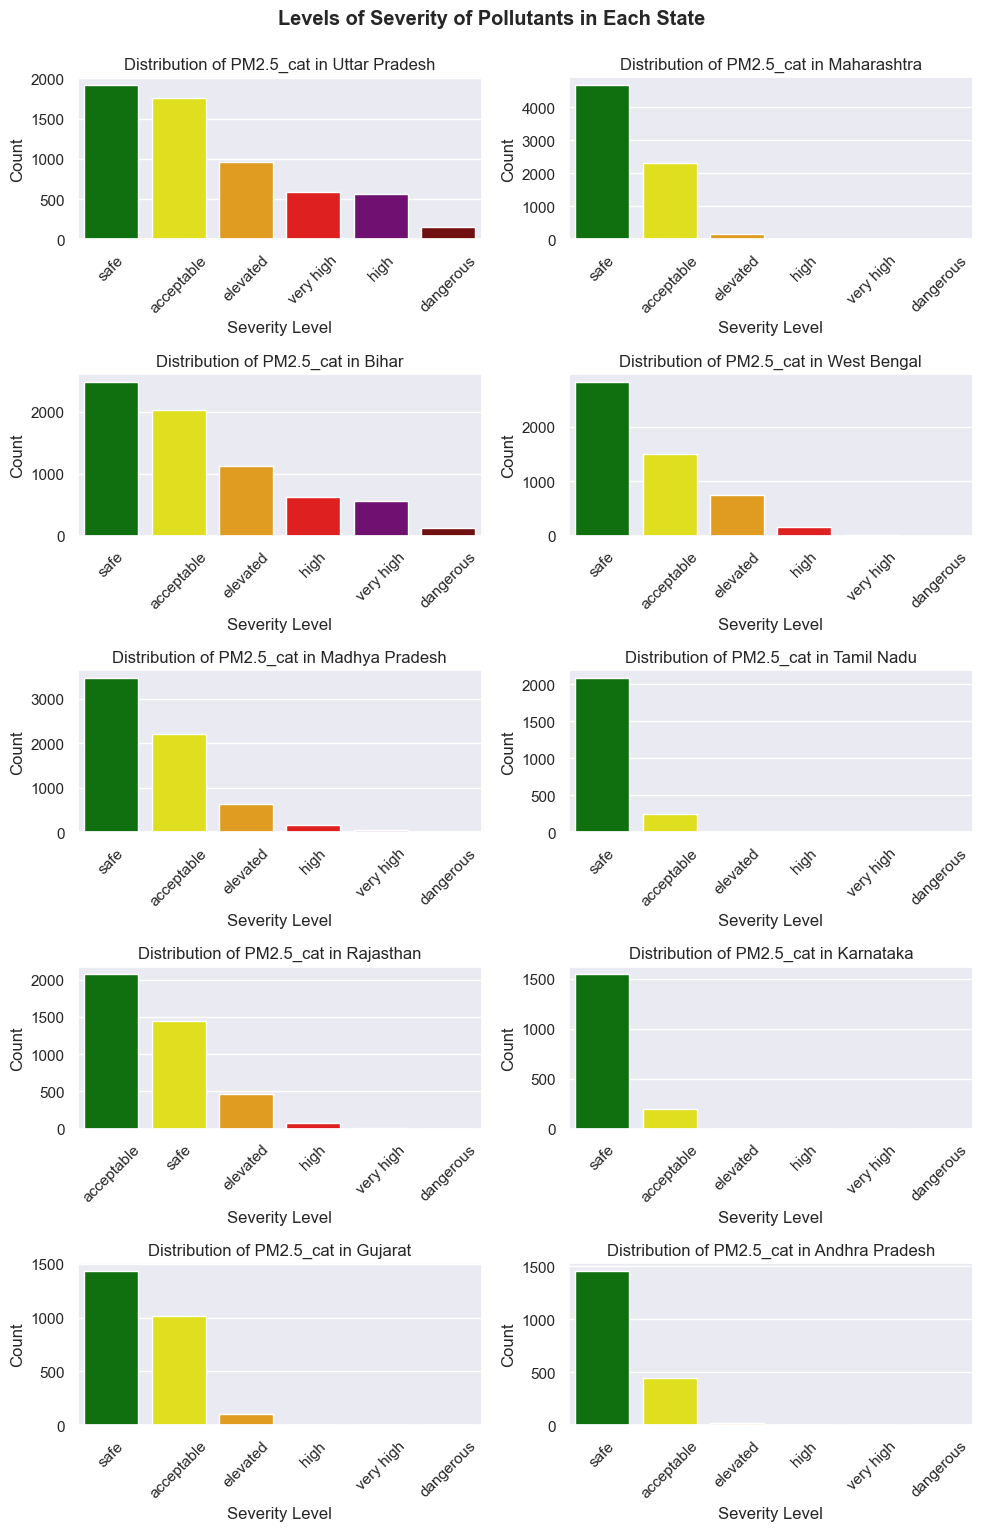

In [67]:
color_palette = ['green', 'yellow', 'orange', 'red', 'purple', 'maroon']

# Assuming you have a nested dictionary named 'reduced_master_data' containing the categorized pollutant levels
sns.set(style="darkgrid")

# Get the number of states
num_states = len(reduced_master_data)

# Calculate the number of rows and columns for subplots
num_rows = 5
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the states
for i, (state, city_data) in enumerate(reduced_master_data.items()):
    # Concatenate the data from all cities within the state
    state_data = pd.concat(city_data.values())
    
    # Select the columns representing pollutant severity levels
    severity_columns = ['PM2.5_cat']
    
    # Plot the distribution of pollutant severity levels for the current state
    for column in severity_columns:
        ax = axes[i]  # Select the appropriate subplot
        sns.countplot(x=column, data=state_data, order=state_data[column].value_counts().index, ax=ax, palette=color_palette)
        ax.set_title(f"Distribution of {column} in {state}")
        ax.set_xlabel("Severity Level")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)
        ax.yaxis.grid(True)

# Hide any unused subplots
for j in range(num_states, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()
fig.suptitle("Levels of Severity of Pollutants in Each State", fontweight = "bold", y = 1.02)
# Show the plot
plt.show()

> Safe to conclude that UP and Bihar are not benchmarks with respect to environment as there are days when the pollutant levels are dangerous. 

### 10a) How do the levels of pollutants trends with year? 

In [72]:
def average_values_plot(reduced_master_data, feature_name, time_unit):
    fig, ax = plt.subplots(figsize=(12, 8))

    for state, cities in reduced_master_data.items():
        state_average = pd.DataFrame()
        for city, df in cities.items():
            if time_unit == 'year':
                df['Time'] = df['Date'].dt.year
            elif time_unit == 'month':
                df['Time'] = df['Date'].dt.month
            else:
                raise ValueError("Invalid time unit. Please choose either 'year' or 'month'.")
            average_feature = df.groupby('Time')[feature_name].mean().reset_index()
            state_average = pd.concat([state_average, average_feature], ignore_index=True)

        if time_unit == 'month':
            state_average['Time'] = state_average['Time'].apply(lambda x: calendar.month_name[x])
        sns.lineplot(data=state_average, x='Time', y=feature_name, label=state, ax=ax)

    # Set the title and labels
    ax.set_title(f'Average {feature_name} Values Throughout the {time_unit.capitalize()}')
    ax.set_xlabel(time_unit.capitalize())
    ax.set_ylabel(f'Average {feature_name} Value')

    if time_unit == 'month':
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for month names

    # Show the legend
    ax.legend(title='State')

    # Adjust the spacing
    fig.tight_layout()

    # Display the plot
    plt.show()

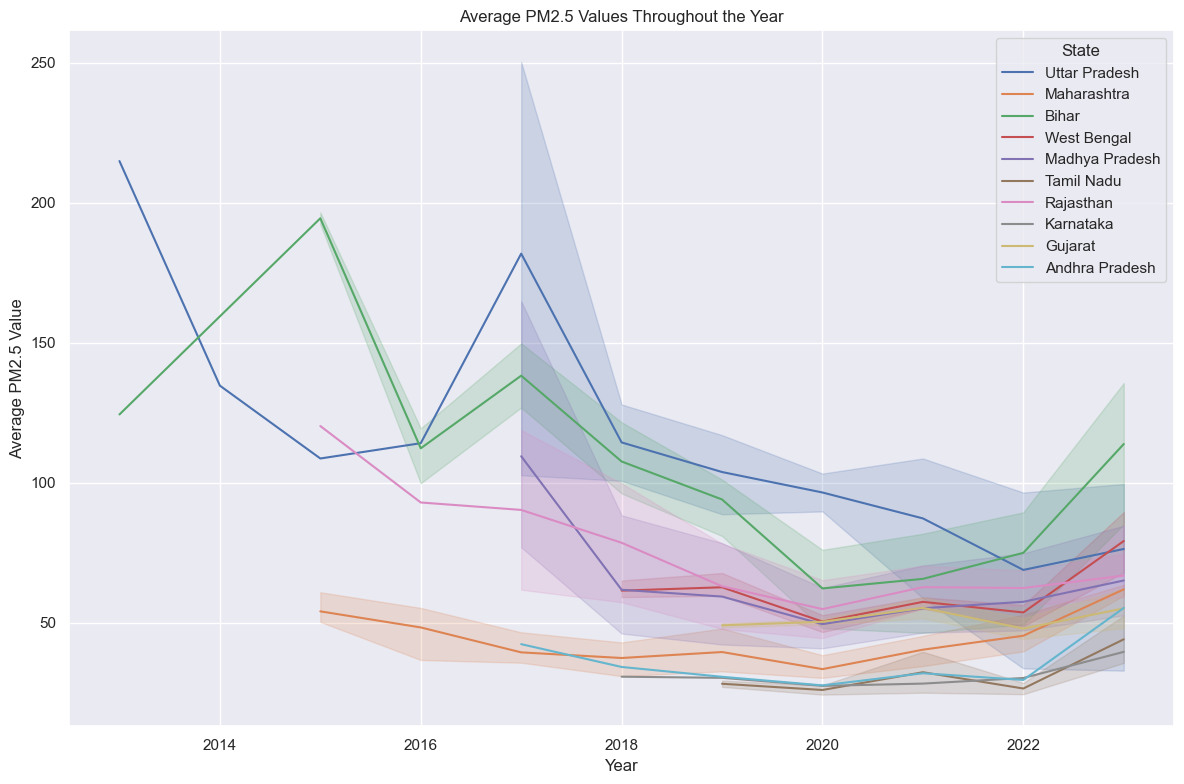

In [73]:
average_values_plot(reduced_master_data, 'PM2.5', 'year')

> Every state showed a dip in pollution during the pandemic time which proves that pollution is a result of human activity

### 10b) How do the levels of pollutants trends with month?

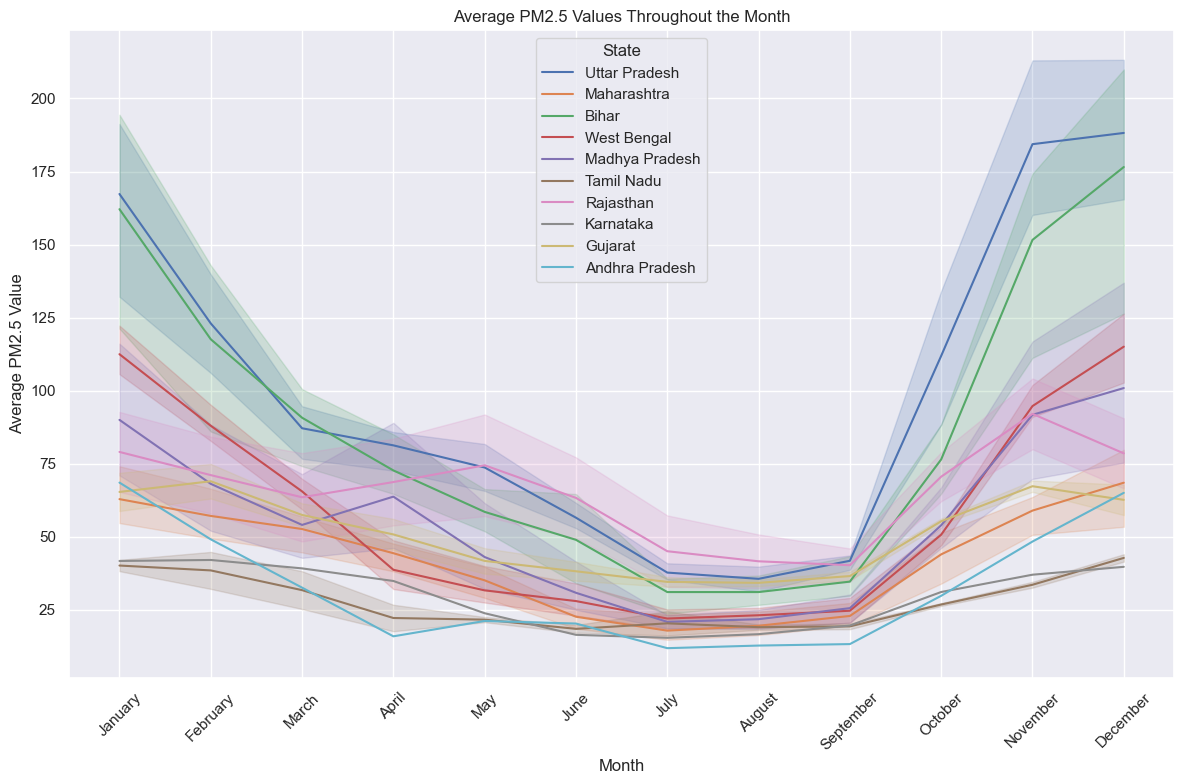

In [74]:
average_values_plot(reduced_master_data, 'PM2.5', 'month')

> All the states show a similar trend throughout the year - the pollution levels increase during winter months and decrease during the summer

# SUMMARY & CONCLUSIONS

The following are my findings from analyzing the air quality of the top 10 populated states of India

- Andhra Pradesh has the best Air Quality Index (AQI), while Uttar Pradesh (UP) has the worst AQI.

- There is a 63% correlation between population and AQI, indicating that highly populated states tend to have higher AQI. However, AQI is influenced by multiple factors such as location, industries, combustion processes, and other human activities that release pollutants. The root mean square error (RMSE) of the fit between population and AQI is 56.

- There is a strong correlation between PM2.5 and CO, as well as PM2.5 and NO2. These pollutants often have common emission sources such as combustion processes, industrial emissions, and vehicle exhaust.

- The correlation between PM2.5 and SO2 is weaker compared to other pollutants. PM2.5 is primarily generated from various sources of particulate matter, while SO2 is mainly produced by burning fossil fuels in power plants, industrial facilities, and residential heating systems.

- Coimbatore and Solapur have the best air quality, while Noida and Ghaziabad have the worst air quality.

- Ahmedabad and Pune exhibit high levels of SO2 emissions, likely due to their status as manufacturing hubs. Bengaluru and Ujjain have the lowest levels of SO2 emissions.

- Delhi consistently records high levels of particulate matter, often exceeding the national average by a significant margin. Delhi's high population density and various emission sources, including vehicles, industries, and households, contribute to its elevated pollution levels.

- During the pandemic, all states experienced a decrease in pollution levels, indicating that pollution is primarily caused by human activity.

- There is a similar trend among states throughout the year, with pollution levels generally increasing during winter months and decreasing during the summer.

It can be concluded that Uttar Pradesh and Bihar are not environmental benchmarks, as they frequently experience dangerous pollutant levels. The data suggests that pollution levels are influenced by population, emission sources, and seasonal variations, highlighting the need for effective measures to mitigate pollution and improve air quality across India.

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "arames52/air-quality-india-eda" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/arames52/air-quality-india-eda


'https://jovian.com/arames52/air-quality-india-eda'

# FUTURE WORK

- We can further analyze the air quality of the other states of India and find the differences in states having good and bad air quality
- This data can be used for making predictions on state level and city level air quality based on historical data
- We can use weather data available (temperature, rainfall) for EDA and make weather predictions
- We can use the other available air quality data for a more extensive analysis and time series predictions


# REFERENCES

- Central Pollution Control Board (CPCB) - Government of India. (https://cpcb.nic.in/)
- Kaggle dataset - https://www.kaggle.com/datasets/abhisheksjha/time-series-air-quality-data-of-india-2010-2023
- https://www.miamidade.gov/environment/library/brochures/air-quality-index.pdf
- https://www.adda247.com/defence-jobs/largest-state-in-india-by-population/
- https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health
- https://www.airnow.gov/aqi/aqi-basics/